# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

# Part A

In [1]:
import numpy as np

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

print(
    f"Classification report for classifier Logistic Regression training set:\n"
    f"{classification_report(y_train, y_pred_train)}\n"
    
    f"Classification report for classifier Logistic Regression test set:\n"
    f"{classification_report(y_test, y_pred_test)}\n"
)

Classification report for classifier Logistic Regression training set:
              precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

Classification report for classifier Logistic Regression test set:
              precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100




/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

## Part B

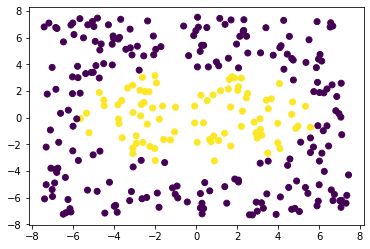

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

# Part C

Text(0.5, 1.0, 'Test Data')

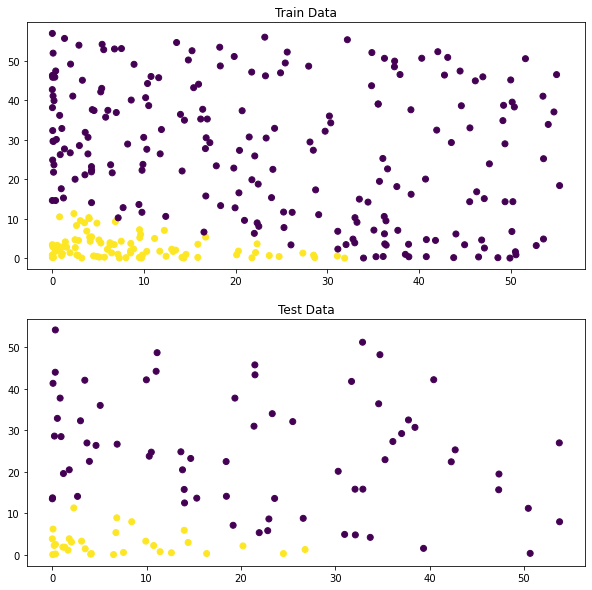

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train**2, y_train)
y_pred_train = logreg.predict(X_train**2)
y_pred_test = logreg.predict(X_test**2)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))
ax1.scatter(X_train[:,0]**2,X_train[:,1]**2,c=y_pred_train)
ax2.scatter(X_test[:,0]**2,X_test[:,1]**2,c=y_pred_test)
ax1.set_title('Train Data')
ax2.set_title('Test Data')

## Answer:

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [5]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

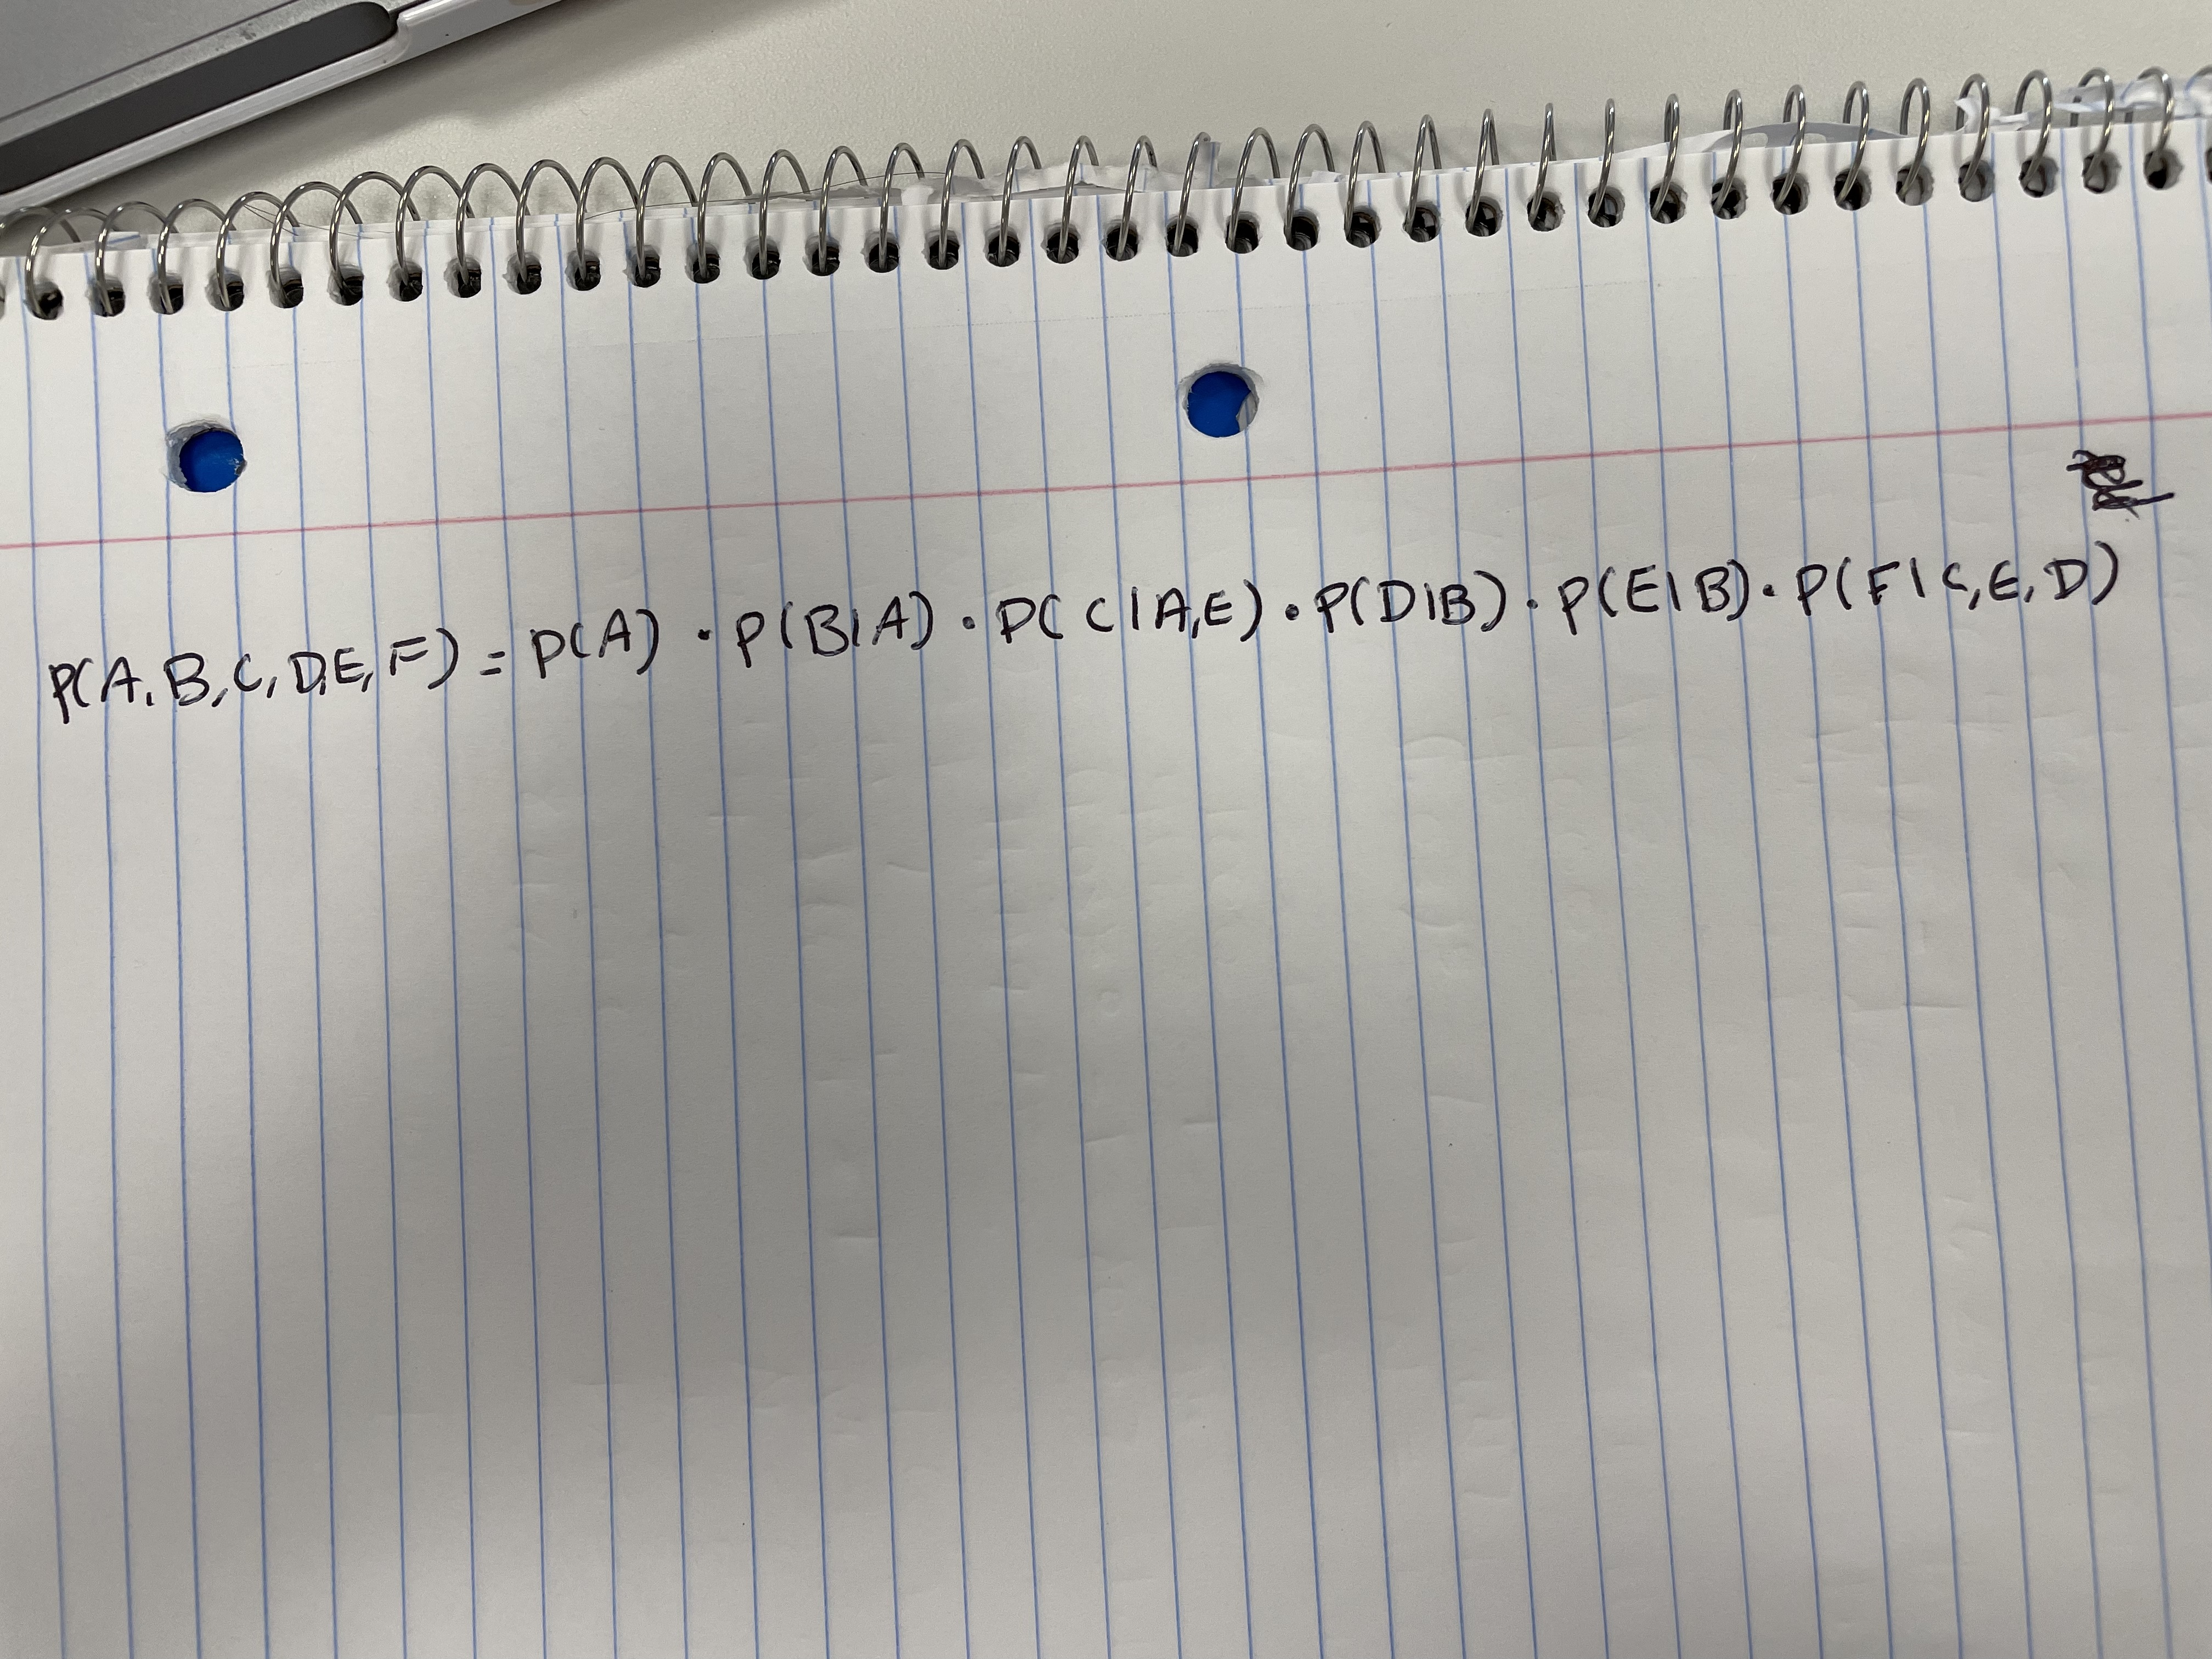

## Answer:


# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer:

In [269]:
# Breast cancer dataset, for Section A only
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# # Pima Diabetes dataset, for Section B only
# def load_diabetes():
#   df = pd.read_csv('diabetes.csv')
#   X = df.drop(['Outcome'], axis=1)
#   y = df[['Outcome']]
#   return X, np.reshape(y, (-1, ))

# X, y = load_diabetes()

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.33, random_state=42)

In [270]:
## Random Forest
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train_b, y_train_b)
y_pred_test_b=rf.predict(X_test_b)
y_pred_train_b=rf.predict(X_train_b)
rf_proba_test_b = rf.predict_proba(X_test_b)
test_accuracy_rf_b=accuracy_score(y_test_b,y_pred_test_b)
train_accuracy_rf_b=accuracy_score(y_train_b,y_pred_train_b)

In [271]:
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_b, y_train_b)
lr_pred_test_b = logreg.predict(X_test_b)
lr_pred_train_b = logreg.predict(X_train_b)
lr_proba_test_b = logreg.predict_proba(X_test_b)
test_accuracy_lg_b=accuracy_score(y_test_b,y_pred_test_b)
train_accuracy_lg_b=accuracy_score(y_train_b,y_pred_train_b)

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [272]:
## MLP
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_b, y_train_b)
mlp_pred_test_b = mlp.predict(X_test_b)
mlp_pred_train_b = mlp.predict(X_train_b)
mlp_proba_test_b = mlp.predict_proba(X_test_b)
test_accuracy_mlp_b=accuracy_score(y_test_b,y_pred_test_b)
train_accuracy_mlp_b=accuracy_score(y_train_b,y_pred_train_b)

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [273]:
# table
d=[train_accuracy_rf_b,train_accuracy_lg_b,train_accuracy_mlp_b]
table=pd.DataFrame(d,index=['Random Forest','Logistic Regression','MLP'],columns=['Train Accuracy'])
table['Test Accuracy']=[test_accuracy_rf_b,test_accuracy_lg_b,test_accuracy_mlp_b]
table

Train Accuracy  Test Accuracy
Random Forest              0.963255        0.93617
Logistic Regression        0.963255        0.93617
MLP                        0.963255        0.93617

In [274]:
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y, test_size=0.33, random_state=42)

In [275]:
## Random Forest
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train_a, y_train_a)
y_pred_test_a=rf.predict(X_test_a)
y_pred_train_a=rf.predict(X_train_a)
rf_proba_test_a = rf.predict_proba(X_test_a)
test_accuracy_rf_a=accuracy_score(y_test_a,y_pred_test_a)
train_accuracy_rf_a=accuracy_score(y_train_a,y_pred_train_a)



<ipython-input-275-8b6fe517da35>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_a, y_train_a)


In [276]:
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_a, y_train_a)
lr_pred_test_a = logreg.predict(X_test_a)
lr_pred_train_a = logreg.predict(X_train_a)
lr_proba_test_a = logreg.predict_proba(X_test_a)
test_accuracy_lg_a=accuracy_score(y_test_a,y_pred_test_a)
train_accuracy_lg_a=accuracy_score(y_train_a,y_pred_train_a)

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [277]:
## MLP
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_a, y_train_a)
mlp_pred_test_a = mlp.predict(X_test_a)
mlp_pred_train_a = mlp.predict(X_train_a)
mlp_proba_test_a = mlp.predict_proba(X_test_a)
test_accuracy_mlp_a=accuracy_score(y_test_a,y_pred_test_a)
train_accuracy_mlp_a=accuracy_score(y_train_a,y_pred_train_a)


/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [278]:
# table
d=[train_accuracy_rf_a,train_accuracy_lg_a,train_accuracy_mlp_a]
table=pd.DataFrame(d,index=['Random Forest','Logistic Regression','MLP'],columns=['Train Accuracy'])
table['Test Accuracy']=[test_accuracy_rf_a,test_accuracy_lg_a,test_accuracy_mlp_a]
table

Train Accuracy  Test Accuracy
Random Forest              0.774513       0.781221
Logistic Regression        0.774513       0.781221
MLP                        0.774513       0.781221

PART B

In [16]:
### Load Breast Cancer Data

from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV


In [279]:
logreg_y_b, logreg_x_b = calibration_curve(y_test_b, lr_proba_test_b[:, 1])
mlp_y_b, mlp_x_b = calibration_curve(y_test_b, mlp_proba_test_b[:,1])
rf_y_b, rf_x_b = calibration_curve(y_test_b, rf_proba_test_b[:, 1])

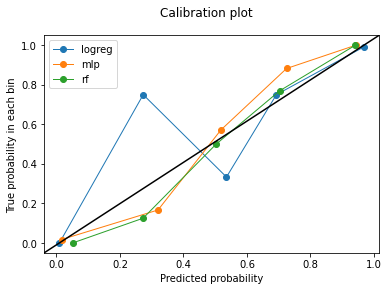

In [280]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(logreg_x_b,logreg_y_b, marker='o', linewidth=1, label='logreg')
plt.plot(mlp_x_b, mlp_y_b, marker='o', linewidth=1, label='mlp')
plt.plot(rf_x_b, rf_y_b, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()


In [19]:
### Load Adult Data

In [281]:
logreg_y_a, logreg_x_a = calibration_curve(y_test_a, lr_proba_test_a[:, 1])
mlp_y_a, mlp_x_a = calibration_curve(y_test_a, mlp_proba_test_a[:,1])
rf_y_a, rf_x_a = calibration_curve(y_test_a, rf_proba_test_a[:, 1])

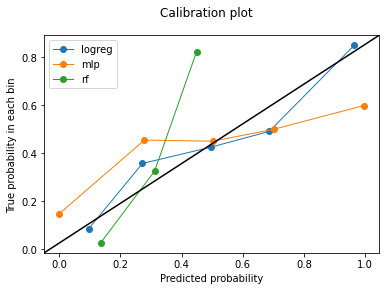

In [282]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(logreg_x_a,logreg_y_a, marker='o', linewidth=1, label='logreg')
plt.plot(mlp_x_a, mlp_y_a, marker='o', linewidth=1, label='mlp')
plt.plot(rf_x_a, rf_y_a, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()


## Part C

In [22]:
!pip install dice-ml

In [23]:
### Adult
import dice_ml

In [24]:
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()


# Adult Dataset 

In [283]:
test_a= X_test_a.copy()
test_a['target']=y_test_a
d = dice_ml.Data(dataframe=test_a, continuous_features=['age','capital-gain','capital-loss', 'education-num','hours-per-week'], outcome_name='target')

## Adult CounterFactuals Using Random 

In [284]:
## Random Forest CounterFactual Adult Random
rf_model_a = rf.fit(X_train_a, y_train_a)
# Using sklearn backend
m = dice_ml.Model(model=rf_model_a, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method="random")
## Random Forest CounterFactual Adult Generation
e1_rf_a = exp.generate_counterfactuals(X_test_a[0:15], total_CFs=5)
e1_rf_a.visualize_as_dataframe()

<ipython-input-284-17f49cfd5223>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_a = rf.fit(X_train_a, y_train_a)
100%|██████████| 15/15 [00:18<00:00,  1.25s/it]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   32   37085             16         93720          2486              38   
1   73  160178             13         29822          4004               1   
2   88  266084             13         81985          1994              32   
3   73  160178             13         29822          4004               1   
4   55  191722             10         16707          3536              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       1                     1   
2             0                       1                     0   
3             0                       1                     1   
4             1                       1                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         1                         0            0   
1                         0                         0            0   
2                         0                         1            1   
3                         0                         0            0   
4                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            0            1          0       1  
2            1            1            0          0       1  
3            0            0            1          0       1  
4            0            1            1          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   57   50567              9         90690          4074              58   
1   57   50567              9         90690          4074              58   
2   57   50567              9         90690          4074              58   
3   57   50567              9         90690          4074              58   
4   45   50567              9         10461          2525              91   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         1                         0            0   
3                         1                         0            0   
4                         1                         1            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            1            1          0       1  
1            1            1            1          0       1  
2            1            1            1          0       1  
3            1            1            1          0       1  
4            0            1            1          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13          7751             0              55   
1   29  185908             13         13891             0              55   
2   29  185908             13         50200             0              55   
3   29  185908             13         17784             0              55   
4   29  185908             13          7751             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        1                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   
1                         0                         0            1   
2                         0                         0            1   
3                         0                         0            1   
4                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       1  
1            0            0            0          1       1  
2            0            0            0          1       1  
3            0            0            0          1       1  
4            0            0            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   81  190040              8         12978           267              40   
1   74   83998             13         81955          2514              40   
2   30  190040             13         17481          2064              17   
3   74   83998             13         81955          2514              40   
4   30  190040             13         17481          2064              17   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             1                       0                     0   
2             0                       0                     0   
3             1                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         1                         1            0   
3                         0                         0            0   
4                         1                         1            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             14         69045          2566              50   
1   29  189346             14         69045          2566              50   
2   70  112820             15         67468          2431              50   
3   80  189346             14         69045          2566              50   
4   80  189885             14         69045          2566              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        1                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   
1                         0                         0            1   
2                         0                         0            0   
3                         0                         0            1   
4                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          1       1  
1            0            1            1          1       1  
2            0            1            0          1       1  
3            0            1            1          1       1  
4            0            1            1          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   32  108435             14         96061             0              47   
1   51  108435             14         53006             0              47   
2   51  108435             14         91316             0              47   
3   51  108435             14         53006             0              47   
4   51  108435             14         19144             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             1                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024          2578              60   
1   58   93664              9         15024          2322              60   
2   58   93664              9         15024          2398              60   
3   58   93664              9         15024          2521              60   
4   58   93664             16         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     1   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         1            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   70  148431             14         54812          2098              40   
1   22  148431              9         78779          4288              93   
2   70  148431             14         54812          2098              40   
3   70  148431             14         54812          2098              40   
4   22  148431              9         78779          4288              93   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             1                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             1                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   1   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            1   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            1          1       1  
1            1            0            1          1       1  
2            0            0            1          1       1  
3            0            0            1          1       1  
4            1            0            1          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   26  313321             16         60462          2679              44   
1   76  313321              2         80095          2915              61   
2   78  313321             15         12420          3714               9   
3   78  313321             15         12420          3714               9   
4   50  133616             13         51982          1439              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     1   
1             0                       1                     0   
2             1                       0                     1   
3             1                       0                     1   
4             1                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        1                   1   
1                        0  ...                        0                   1   
2                        0  ...                        1                   0   
3                        0  ...                        1                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         1            0   
1                         0                         0            0   
2                         0                         0            1   
3                         0                         0            1   
4                         1                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            1          1       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9         30751             0              40   
1   50   71417              9         30751             0              40   
2   50   71417              9         30751             0              40   
3   50   71417              9         30751             0              40   
4   50  162312             13         15288             0              94   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     1   
3             0                       0                     1   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        1                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         1            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13         62258             0              42   
1   43  241895             13         33821             0              86   
2   43  190457             13         47136             0              83   
3   43  190457             13         47136             0              83   
4   43  190457             13         47136             0              83   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       1                     0   
3             0                       1                     0   
4             0                       1                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       1  
1            0            1            0          1       1  
2            1            1            0          1       1  
3            1            1            0          1       1  
4            1            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9         21294          4316              74   
1   37  271013              9         21294          4316              74   
2   37  271013              9         21294          4316              74   
3   48  271013             15         59716             0              45   
4   37  115602             14         48183          4267              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            1          1       1  
4            1            1            1          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13         20684             0              44   
1   41  152529             13         49065          1635              40   
2   41  152529             13         74393             0              40   
3   41  152529             13         20684             0              44   
4   41  152529             13         49065          1635              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             1                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         1                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            1            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4         10771          2681              45   
1   46  116952              4         10771          2681              45   
2   46  116952              4         10771          2681              45   
3   46  116952              4         44170          3876              45   
4   46  116952              4         10771          2681              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         1            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             14         90336             0              35   
1   33  226629             14         90336             0              27   
2   18  226629             15         11223          2500              56   
3   33  226629             14         22946          3236              42   
4   33  226629             14         22946          3236              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     1   
1             0                       0                     1   
2             0                       1                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        1                   1   
1                        0  ...                        1                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         1                         0            0   
3                         0                         0            1   
4                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          0       1  
1            0            1            0          0       1  
2            0            1            1          1       1  
3            1            1            1          0       1  
4            1            1            1          0       1  

[5 rows x 67 columns]

In [285]:
## Logsitic Regression CounterFactual Adult Random
lg_model_a = logreg.fit(X_train_a, y_train_a)
# Using sklearn backend
m = dice_ml.Model(model=lg_model_a, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method="random")
e1_logreg_a = exp.generate_counterfactuals(X_test_a[0:15], total_CFs=5)
e1_logreg_a.visualize_as_dataframe()

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 15/15 [00:03<00:00,  4.72it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0          4160              38   
1   27  160178             10         63752             0              38   
2   27  160178             10             0          3753              38   
3   27  160178             10         62072             0              38   
4   27  160178             10         97736             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        1                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9         35418             0              40   
1   45   50567              9         37170             0              40   
2   45   50567              9          8056             0              40   
3   45   50567              9         58566             0              40   
4   45   50567              9         37152             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0          1933              55   
1   29  185908             13             0          3557              55   
2   29  185908             13          1672             0              55   
3   29  185908             13             0          3387              55   
4   29  185908             13             0          3557              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   
1                         0                         0            1   
2                         0                         0            1   
3                         0                         0            1   
4                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       1  
1            0            0            0          1       1  
2            0            0            0          1       1  
3            0            0            0          1       1  
4            0            0            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13         87245             0              40   
1   30  190040             13         47696             0              40   
2   30  190040             13         96317             0              40   
3   30  190040             13             0          4205              40   
4   30  190040             13             0          3997              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202          2551              50   
1   80  189346             10          2202          1770              50   
2   29  189346             10          2202          2723              50   
3   29  189346             10         12096             0              50   
4   29  189346             10          2202          1249              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            1            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0          3705              47   
1   51  108435             14             0          3694              47   
2   51  108435             14         12097             0              47   
3   51  108435             14         19995             0              47   
4   51  108435             14         55337             0              22   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9           908             0              60   
1   58   93664              9           908             0              60   
2   58   93664              9           908             0              60   
3   58   93664              9           908             0              60   
4   58   93664              9           908             0              31   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     1   
3             0                       0                     1   
4             0                       0                     1   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         1            0   
4                         0                         1            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  
1            0            1            0          1       0  
2            0            1            0          1       0  
3            0            1            0          1       0  
4            0            1            0          1       0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431             14         78148             0              40   
1   22  148431              9         62496             0              40   
2   22  148431              9             0          4046              40   
3   22  148431              9         95236             0              40   
4   22  148431              9         30363             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        1                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       1  
1            1            0            1          0       1  
2            1            0            1          0       1  
3            1            0            1          0       1  
4            1            0            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12         60529             0              40   
1   50  313321             12         60884             0              40   
2   50  313321             12             0          3933              40   
3   50  313321             12          5026             0              40   
4   50  313321             12             0          4025              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              96   
1   50   71417              9          3103             0              69   
2   50   71417              9          3103             0              97   
3   50   71417              9          3103             0              96   
4   50   71417              9          3103             0              92   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  
1            0            1            0          1       0  
2            0            1            0          1       0  
3            0            1            0          1       0  
4            0            1            0          1       0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13         75636             0              42   
1   43  241895             13         46445             0              42   
2   43  241895             13         46456             0              42   
3   43  241895             13             0          4240              42   
4   43  241895             13         54396             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       1                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9         88752             0              40   
1   37  271013              9         63691             0              40   
2   37  271013              9         83684             0              40   
3   37  271013              9          8792             0              40   
4   37  271013              9         51752             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0          4247              40   
1   41  152529             13         72974             0              40   
2   41  152529             13             0          3554              40   
3   41  152529             13         33179             0              40   
4   41  152529             13             0          3746              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4         25400             0              45   
1   46  116952              4         28392             0              45   
2   46  116952              4             0          3239              45   
3   46  116952              4         25000             0              45   
4   46  116952              4         63659             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             1                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10         76467             0              35   
1   33  226629             10         74606             0              35   
2   33  226629             10         47302             0              35   
3   33  226629             10         44074             0              35   
4   33  226629             10         89277             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

In [28]:
### MLP CounterFactual Adult Random
mlp_model_a = mlp.fit(X_train_a, y_train_a)
# Using sklearn backend
m = dice_ml.Model(model=mlp_model_a, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method="random")
e1_mlp_a = exp.generate_counterfactuals(X_test_a[0:15], total_CFs=5)
e1_mlp_a.visualize_as_dataframe()

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
100%|██████████| 15/15 [00:02<00:00,  5.72it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10         95202             0              38   
1   27  160178             10             0          1934              38   
2   27  160178             10             0          2468              38   
3   27  160178             10         48349             0              38   
4   27  160178             10          7706             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45  217161              9             0             0              40   
1   45   50567              9             0          3196              40   
2   45  128016              9             0             0              40   
3   36  287008              9             0             0              40   
4   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  
1            0            1            1          0       0  
2            0            1            1          0       0  
3            0            1            1          0       0  
4            0            1            1          0       0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0          2498              55   
1   29  185908             13         29152             0              55   
2   29  185908             13         47390             0              55   
3   29  185908             13             0          3467              55   
4   29  185908             13             0           417              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   
1                         0                         0            1   
2                         0                         0            1   
3                         0                         0            1   
4                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       1  
1            0            0            0          1       1  
2            0            0            0          1       1  
3            0            0            0          1       1  
4            0            0            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0          2006              40   
1   30   46870             13         68064             0              40   
2   30  190040             13             0          3064              40   
3   30  190040             13         57508             0              40   
4   30  190040             13         11414             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10         63507             0              50   
1   29  189346             10          2202          2106              50   
2   29  189346             10          2202          1807              50   
3   29  189346             10         25817             0              50   
4   29  189346             10         24821             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  248178             14             0             0              75   
1   51  248178             14             0             0              47   
2   51  297449             14             0             0              47   
3   51  242001             14             0             0              47   
4   51  207568             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         1            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  
1            0            1            0          1       0  
2            0            1            0          1       0  
3            0            1            0          1       0  
4            0            1            0          1       0  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58  334999              9          3894             0              60   
1   37   93664              9          1707             0              60   
2   58  334999              9          3894             0              60   
3   37   93664              9          1707             0              60   
4   58  334999              9          3894             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             1                       0                     1   
2             0                       0                     0   
3             1                       0                     1   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        1                   0   
2                        0  ...                        0                   0   
3                        0  ...                        1                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  
1            0            1            0          1       0  
2            0            1            0          1       0  
3            0            1            0          1       0  
4            1            1            0          1       0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9         86751             0              40   
1   22  148431              9         58474             0              40   
2   22  148431              9         81750             0              40   
3   22  148431              9         60408             0              40   
4   22  148431              9             0          1726              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       1  
1            1            0            1          0       1  
2            1            0            1          0       1  
3            1            0            1          0       1  
4            1            0            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             16         75993             0              40   
1   50  313321             12         56100             0              40   
2   50  126675             12         49316             0              40   
3   50  313321             12             0          2656              40   
4   50  313321             12             0          3075              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  446559              9          3103             0              40   
1   50  221745              9          3103             0              40   
2   50  258849              9          3103             0              40   
3   50  221745              9          3103             0              40   
4   50  302422              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         1                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  
1            0            1            0          1       0  
2            0            1            0          1       0  
3            0            1            0          1       0  
4            0            1            0          1       0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13         97296             0              42   
1   43  241895             13         38027             0              42   
2   43  241895             13         93332             0              42   
3   43  241895             13             0          3563              42   
4   43  241895             13         92436             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9         63970             0              40   
1   37  271013              9         27136             0              40   
2   37  271013              9         31570             0              40   
3   37  271013              9         22122             0              40   
4   37  271013              9         97995             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            0            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13         18359             0              40   
1   41  152529             13             0          1110              40   
2   41  152529             13         73331             0              40   
3   41  152529             13             0          4010              40   
4   41  152529             13             0          2226              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   
1                        0  ...                        0                   0   
2                        0  ...                        0                   0   
3                        0  ...                        0                   0   
4                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  
1            1            1            0          1       1  
2            0            1            0          1       1  
3            0            1            0          1       1  
4            0            1            0          1       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4         12051             0              45   
1   46   36162              4             0             0              45   
2   46   34248              4             0             0              45   
3   46  116952              4         55681          3137              45   
4   46  116952              4         41524             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0          3325              35   
1   33  226629             10             0          1625              35   
2   33  226629             10             0          1779              35   
3   33  226629             10             0          1284              35   
4   33  226629             10         26709             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   
1                        0  ...                        0                   1   
2                        0  ...                        0                   1   
3                        0  ...                        0                   1   
4                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   
1                         0                         0            0   
2                         0                         0            0   
3                         0                         0            0   
4                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       1  
1            0            1            1          0       1  
2            0            1            1          0       1  
3            0            1            1          0       1  
4            0            1            1          0       1  

[5 rows x 67 columns]

### Adult Validity, Scarcity, Diversity, Proximity, and MMD Using Random CounterFactuals

In [286]:
import statistics as stat
## Adult Random Forest Random Validity 
valid_a_random_rf=[]
for i in range (0,15):
    numbers=e1_rf_a.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_a.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_a_random_rf.append(validity)
    valid_a_random_rf

mean_valid_rf_random=stat.mean(valid_a_random_rf)
mean_valid_rf_random
    

0.6666666666666666

In [287]:
## Adult Logistic Regression Random Validity 
valid_a_random_lg=[]
for i in range (0,15):
    numbers=e1_logreg_a.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_a.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_a_random_lg.append(validity)
    valid_a_random_lg

    
mean_valid_lg_random=stat.mean(valid_a_random_lg)
mean_valid_lg_random


0.8

In [288]:
## Adult MLP Random Validity 
valid_a_random_mlp=[]
for i in range (0,15):
    numbers=e1_mlp_a.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_a.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_a_random_mlp.append(validity)
    valid_a_random_mlp
    
mean_valid_mlp_random=stat.mean(valid_a_random_mlp)
mean_valid_mlp_random

0.8

In [289]:
## Adult Sparcity Random Forest Random

sparc_a_random_rf=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_rf_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_a.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_a_random_rf.append(sparcity(df_cf,df_cf_orig))

mean_sparc_a_random_rf= stat.mean(sparc_a_random_rf)
mean_sparc_a_random_rf
    


0.8164502164502164

In [290]:
## Adult Sparcity Logistic Regression Random

sparc_a_random_logreg=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_logreg_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_a.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_a_random_logreg.append(sparcity(df_cf,df_cf_orig))


mean_sparc_a_random_logreg= stat.mean(sparc_a_random_logreg)
mean_sparc_a_random_logreg

0.9777056277056277

In [291]:
## Adult Sparcity MLP Random

sparc_a_random_mlp=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_mlp_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_a.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_a_random_mlp.append(sparcity(df_cf,df_cf_orig))


mean_sparc_a_random_mlp= stat.mean(sparc_a_random_mlp)
mean_sparc_a_random_mlp

0.9727272727272727

In [292]:
## Adult Proximity Random Forest Random

prox_a_random_rf=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_rf_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_a.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_a_random_rf.append(proximity(df_cf,df_cf_orig))


mean_prox_a_random_rf= abs(stat.mean(prox_a_random_rf))
mean_prox_a_random_rf

0.19708145081260417

In [293]:
## Adult Proximity Logistic Regression Random

prox_a_random_logreg=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_logreg_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_a.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_a_random_logreg.append(proximity(df_cf,df_cf_orig))


mean_prox_a_random_logreg= abs(stat.mean(prox_a_random_logreg))
mean_prox_a_random_logreg

0.7327097505668934

In [294]:
## Adult Proximity MLP Random
prox_a_random_mlp=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_mlp_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_a.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_a_random_mlp.append(proximity(df_cf,df_cf_orig))


mean_prox_a_random_mlp= abs(stat.mean(prox_a_random_mlp))
mean_prox_a_random_mlp

0.6944444444444444

In [203]:
## Adult Diveristy Random Forest Random

div_a_random_rf=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 *count * (len(df_cf))
for m in range (0,14):
    df_cf = e1_rf_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_a.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_a_random_rf.append(diversity(df_cf,df_cf_orig))


mean_div_a_random_rf= stat.mean(div_a_random_rf)
mean_div_a_random_rf



<ipython-input-203-b1dc63b48c77>:20: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_div_a_random_rf= stat.mean(div_a_random_rf)


283.0

In [202]:
## Adult Diveristy Logistic Regression Random

div_a_random_logreg=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 *count * (len(df_cf))
#*(len(df_cf))
for m in range (0,14):
    df_cf = e1_logreg_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_a.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_a_random_logreg.append(diversity(df_cf,df_cf_orig))


mean_div_a_random_logreg= stat.mean(div_a_random_logreg)
mean_div_a_random_logreg



<ipython-input-202-901f5e304482>:21: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_div_a_random_logreg= stat.mean(div_a_random_logreg)


37.5

In [201]:
## Adult Diveristy MLP Random

div_a_random_mlp=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 *count * (len(df_cf))
#*(len(df_cf))
for m in range (0,14):
    df_cf = e1_mlp_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_a.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_a_random_mlp.append(diversity(df_cf,df_cf_orig))


mean_div_a_random_mlp= stat.mean(div_a_random_mlp)
mean_div_a_random_mlp

<ipython-input-201-cf9a02e0d544>:21: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_div_a_random_mlp= stat.mean(div_a_random_mlp)


45.0

In [295]:
## Adult MMD Random Forest Random

def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()


# test_data = X_test_ad.copy()
# test_data['target'] = y_test_ad
# mmd = []
# mmd_score_a_random_rf = []

test_data = X_test_a.copy()
test_data['target'] = y_test_a
mmd = []
mmd_score_a_random_rf = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_rf_a.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_data.iloc[i]).transpose()))
    mmd_score_a_random_rf.append((sum(mmd)/len(mmd)))

mmd_a_random_rf= stat.mean(mmd_score_a_random_rf)
mmd_a_random_rf


1.2524822543187755

In [244]:
## Adult MMD Logistic Regression Random
mmd = []
mmd_score_a_random_logreg = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_logreg_a.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_data.iloc[i]).transpose()))
    mmd_score_a_random_logreg.append((sum(mmd)/len(mmd)))

mmd_a_random_logreg= stat.mean(mmd_score_a_random_logreg)
mmd_a_random_logreg


1.2018075978310785

In [245]:
## Adult MMD MLP Random
mmd = []
mmd_score_a_random_mlp = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_mlp_a.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_data.iloc[i]).transpose()))
    mmd_score_a_random_mlp.append((sum(mmd)/len(mmd)))

mmd_a_random_mlp= stat.mean(mmd_score_a_random_mlp)
mmd_a_random_mlp

1.2065629089580545

## Change Adult Data to work with Genetic 

In [35]:
X_ad, y_ad = load_adult()

X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.33, random_state=42)

X_test_ad

X_train_ad = X_train_ad.astype(int)

y_train_ad = y_train_ad.astype(int)

X_test_ad = X_test_ad.astype(int)

y_test_ad = y_test_ad.astype(int)

X_train_ad['workclass_0'] = X_train_ad['workclass_ ?']
X_test_ad['workclass_0'] = X_test_ad['workclass_ ?']


X_train_ad.drop(['workclass_ ?'], axis = 1, inplace = True)

X_test_ad.drop(['workclass_ ?'], axis = 1, inplace = True)
X_test_ad

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
14160   27  160178             10             0             0              38   
27048   45   50567              9             0             0              40   
28868   29  185908             13             0             0              55   
5667    30  190040             13             0             0              40   
7827    29  189346             10          2202             0              50   
...    ...     ...            ...           ...           ...             ...   
12795   22  320451             10             0             0              24   
12129   33   70447              9             0             0              40   
12017   65   24824              9             0             0              40   
22468   42  175674              9             0             0              60   
16068   28  149769              9             0             0              40   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
14160                       0                     0                        0   
27048                       0                     0                        0   
28868                       0                     0                        0   
5667                        0                     0                        0   
7827                        0                     0                        0   
...                       ...                   ...                      ...   
12795                       0                     0                        0   
12129                       0                     0                        0   
12017                       0                     1                        0   
22468                       0                     0                        0   
16068                       0                     0                        0   

       workclass_ Private  ...  relationship_ Unmarried  relationship_ Wife  \
14160                   1  ...                        0                   0   
27048                   0  ...                        0                   1   
28868                   1  ...                        0                   0   
5667                    1  ...                        0                   0   
7827                    0  ...                        0                   0   
...                   ...  ...                      ...                 ...   
12795                   1  ...                        0                   0   
12129                   1  ...                        0                   0   
12017                   0  ...                        0                   0   
22468                   0  ...                        0                   0   
16068                   1  ...                        0                   0   

       race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
14160                         0                         0            0   
27048                         0                         0            0   
28868                         0                         0            1   
5667                          0                         0            0   
7827                          0                         0            0   
...                         ...                       ...          ...   
12795                         0                         1            0   
12129                         0                         1            0   
12017                         0                         0            0   
22468                         0                         0            0   
16068                         0                         1            0   

       race_ Other  race_ White  sex_ Female  sex_ Male  workclass_0  
14160            0            1            1          0            0  
27048            0            1            1          0            0  
28868            0    

## Adult CounterFactuals Using Genetic

In [36]:
## Adult Random Forest CounterFactual using Genetic
test_data = X_test_ad.copy()
test_data['target'] = y_test_ad

rf_model_a_genetic = rf.fit(X_train_ad, y_train_ad)
col_features= X_train_ad.columns.values
d = dice_ml.Data(dataframe=test_data, continuous_features = list(col_features),outcome_name='target')
# Using sklearn backend
m = dice_ml.Model(model=rf_model_a_genetic, backend="sklearn")
# Using method=random for generating CFs
exp_genetic_a = dice_ml.Dice(d, m, method="genetic")
## Random Forest CounterFactual Adult Generation
e1_rf_a_genetic = exp_genetic_a.generate_counterfactuals(X_test_ad[0:15], total_CFs=5)
e1_rf_a_genetic.visualize_as_dataframe()

<ipython-input-36-915abf103df6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_a_genetic = rf.fit(X_train_ad, y_train_ad)
100%|██████████| 15/15 [00:45<00:00,  3.04s/it]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  49.0  176814.0           13.0        5178.0           0.0            40.0   
0  31.0  173730.0           13.0       15024.0           0.0            40.0   
0  39.0  134737.0           14.0        7688.0           0.0            65.0   
0  34.0  134737.0           14.0        7688.0           0.0             1.0   
0  27.0  190525.0           13.0        7298.0           0.0            55.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  48.0  118330.0           13.0        5178.0           0.0            40.0   
0  53.0   43952.0           14.0       15024.0           0.0            38.0   
0  42.0   34218.0           13.0        5178.0           0.0            50.0   
0  41.0  103986.0           13.0        7688.0           0.0            70.0   
0  46.0   20956.0           13.0       15024.0           0.0            45.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            1            0            0   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  27.0  190525.0           13.0        7298.0           0.0            55.0   
0  27.0  167005.0           13.0        7298.0           0.0            55.0   
0  41.0  168071.0           13.0        7298.0           0.0            50.0   
0  32.0  195000.0           13.0        7298.0           0.0            45.0   
0  44.0  167005.0           13.0        7688.0           0.0            60.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  32.0  195000.0           13.0       15024.0           0.0            40.0   
0  39.0  186824.0           13.0       15024.0           0.0            40.0   
0  17.0  192337.0           13.0       15024.0           0.0            40.0   
0  28.0  196385.0           13.0        7298.0           0.0            42.0   
0  49.0  176814.0           13.0        5178.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  54.0  172898.0           15.0        5178.0           0.0            50.0   
0  45.0  192776.0           13.0        7298.0           0.0            55.0   
0  36.0  182898.0           13.0        7298.0           0.0            40.0   
0  44.0  196545.0           13.0        7298.0           0.0            40.0   
0  39.0  173476.0           15.0        7688.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  34.0  134737.0           14.0        7688.0           0.0            55.0   
0  48.0  126754.0           14.0       15024.0           0.0            40.0   
0  41.0  122215.0           14.0       15024.0           0.0            40.0   
0  34.0  103986.0           15.0       15024.0           0.0            35.0   
0  44.0   99651.0           14.0        5178.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  38.0  139734.0           13.0       15024.0           0.0            40.0   
0  41.0  100800.0           14.0        7298.0           0.0            70.0   
0  45.0  102308.0           14.0       15024.0           0.0            60.0   
0  43.0  100800.0           13.0        7298.0           0.0             1.0   
0  60.0   93997.0           13.0       15024.0           0.0            45.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            1            0   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  49.0  176814.0           13.0        5178.0           0.0            40.0   
0  17.0   14878.0           13.0        7688.0           0.0            40.0   
0  39.0   14878.0           13.0        7688.0           0.0            40.0   
0  39.0  122215.0           14.0        7688.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  

[4 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  50.0  205803.0           14.0       15024.0           0.0            40.0   
0  51.0  289572.0           13.0        7688.0           0.0            50.0   
0  28.0  207513.0           13.0        7298.0           0.0            42.0   
0  17.0  207513.0           13.0        7298.0           0.0            42.0   
0  33.0  251120.0           13.0        7688.0           0.0            50.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  47.0  121124.0           13.0       15024.0           0.0            50.0   
0  41.0  100800.0           14.0       15024.0           0.0            45.0   
0  50.0   88842.0           13.0        7298.0           0.0            40.0   
0  35.0  120277.0           15.0        7688.0           0.0            50.0   
0  44.0   99651.0           14.0        5178.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  38.0  280169.0           13.0        7298.0           0.0            50.0   
0  41.0  280169.0           13.0       15024.0           0.0            45.0   
0  38.0  238342.0           13.0        7688.0           0.0            42.0   
0  28.0  207513.0           13.0        7298.0           0.0            42.0   
0  44.0  198096.0           13.0        7688.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     1.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  35.0  202027.0           13.0        7298.0           0.0            35.0   
0  38.0   14878.0           13.0        7688.0           0.0            45.0   
0  37.0  220237.0           13.0        5178.0           0.0            40.0   
0  44.0   14878.0           13.0        7688.0           0.0             1.0   
0  36.0  202027.0           15.0        7688.0           0.0            60.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  36.0  174717.0           13.0        7688.0           0.0            40.0   
0  53.0  149784.0           13.0        7688.0           0.0            40.0   
0  36.0  174717.0           13.0        7688.0           0.0             1.0   
0  61.0  176839.0           13.0       15024.0           0.0            50.0   
0  39.0  179668.0           13.0       15024.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  50.0  147629.0           14.0       15024.0           0.0            45.0   
0  53.0  149784.0           13.0        7688.0           0.0            40.0   
0  37.0  103986.0           13.0        7688.0           0.0            39.0   
0  44.0  120277.0           13.0       15024.0           0.0            50.0   
0  34.0  134737.0           14.0        7688.0           0.0            55.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  30.0  251120.0           13.0        7688.0           0.0            50.0   
0  40.0  226902.0           13.0        7688.0           0.0            50.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  

[2 rows x 67 columns]

In [37]:
## Logsitic Regression CounterFactual Adult Genetic
lg_model_a_genetic = logreg.fit(X_train_ad, y_train_ad)
# Using sklearn backend
m = dice_ml.Model(model=lg_model_a_genetic, backend="sklearn")
# Using method=genetic for generating CFs
exp_genetic_a = dice_ml.Dice(d, m, method="genetic")
e1_logreg_a_genetic = exp_genetic_a.generate_counterfactuals(X_test_ad[0:15], total_CFs=5)
e1_logreg_a_genetic.visualize_as_dataframe()

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 15/15 [00:10<00:00,  1.45it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  17.0  162256.0           10.0        6849.0           0.0             1.0   
0  35.0  162256.0           11.0        6849.0           0.0            40.0   
0  17.0  157747.0           10.0        7298.0           0.0            40.0   
0  17.0  151888.0           10.0        4416.0           0.0             1.0   
0  17.0   14878.0           11.0        7298.0           0.0             1.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age   fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  32.0  33662.0           14.0        3103.0           0.0            40.0   
0  39.0  42186.0            9.0        3464.0           0.0            20.0   
0  34.0  56460.0            9.0           0.0        2179.0            12.0   
0  17.0  45781.0           14.0        5013.0           0.0             1.0   
0  34.0  34848.0            9.0        4064.0           0.0             1.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 1.0                       0.0   
0                 0.0  ...                 1.0                       0.0   
0                 0.0  ...                 1.0                       0.0   
0                 0.0  ...                 1.0                       0.0   
0                 0.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       1.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          0.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          1.0        1.0          0.0       1  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            1            0            0   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  27.0  190525.0           13.0        7298.0           0.0            55.0   
0  57.0  182677.0           13.0        4508.0           0.0            40.0   
0  36.0  187847.0           13.0        7688.0           0.0            40.0   
0  27.0   14878.0           13.0        7298.0           0.0             1.0   
0  45.0  179659.0           13.0        3103.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       1.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  30.0  189759.0           13.0        4865.0           0.0            40.0   
0  17.0  189759.0           13.0        4865.0           0.0            40.0   
0  38.0  194630.0           13.0        4787.0           0.0            43.0   
0  29.0  188246.0           13.0        7298.0           0.0            45.0   
0  29.0  190539.0           13.0        6849.0           0.0            48.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   1.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  29.0   14878.0            1.0        7688.0           0.0            60.0   
0  17.0   14878.0            9.0        3137.0           0.0            40.0   
0  17.0   14878.0            1.0           0.0           0.0             1.0   
0  17.0  183811.0            1.0        7298.0           0.0             1.0   
0  27.0  190539.0           10.0        7298.0           0.0            54.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  66.0  116468.0           14.0        2936.0           0.0            20.0   
0  44.0   99651.0           14.0        5178.0           0.0            40.0   
0  30.0  110643.0           14.0        4386.0           0.0            40.0   
0  53.0  106176.0           14.0        7298.0           0.0            60.0   
0  35.0  116960.0           14.0           0.0        1887.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   1.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  58.0   93664.0            9.0       15024.0           0.0            60.0   
0  35.0   14878.0           11.0        7688.0           0.0            60.0   
0  35.0   89508.0           10.0        3908.0           0.0            60.0   
0  41.0  100800.0           14.0        7298.0           0.0            70.0   
0  37.0  108140.0           14.0       15024.0           0.0             1.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            1            0   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  33.0  154874.0            9.0        4416.0           0.0            40.0   
0  33.0  151584.0            9.0        8614.0           0.0            40.0   
0  23.0  152683.0            1.0        3908.0           0.0            50.0   
0  33.0  150570.0            1.0        3103.0           0.0            30.0   
0  34.0  154874.0            9.0        4416.0           0.0            30.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  45.0  339863.0           13.0        8614.0           0.0            48.0   
0  49.0  287647.0           14.0        4787.0           0.0            45.0   
0  39.0   14878.0            5.0        4650.0           0.0            34.0   
0  27.0  314240.0           12.0        3325.0           0.0            40.0   
0  17.0  331419.0            1.0       10520.0           0.0             1.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age   fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  50.0  71417.0            9.0        3103.0           0.0            40.0   
0  27.0  57052.0            9.0        2885.0           0.0            40.0   
0  55.0  61708.0            9.0        6418.0           0.0            50.0   
0  42.0  78765.0           10.0        3103.0           0.0            45.0   
0  49.0  87928.0           11.0        5013.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  33.0  247880.0           13.0        7688.0           0.0            40.0   
0  41.0  227734.0           13.0        3464.0           0.0             1.0   
0  38.0  238342.0           13.0        7688.0           0.0            42.0   
0  41.0  236021.0            9.0       15024.0           0.0             1.0   
0  29.0   14878.0            1.0        7688.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     1.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     1.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  25.0  272428.0            9.0        4416.0           0.0            42.0   
0  55.0  256526.0            9.0        4865.0           0.0            45.0   
0  49.0  287647.0           14.0        4787.0           0.0            45.0   
0  31.0  263561.0            1.0        4416.0           0.0            45.0   
0  17.0  263561.0            9.0        7688.0           0.0            45.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  53.0  149784.0           13.0        7688.0           0.0            40.0   
0  33.0  150570.0           13.0        3103.0           0.0            43.0   
0  34.0  154874.0            9.0        4416.0           0.0            30.0   
0  33.0  150570.0           13.0        4650.0           0.0             1.0   
0  23.0   14878.0            1.0        4650.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  38.0  111398.0           13.0        7688.0           0.0            40.0   
0  38.0   14878.0           10.0        3103.0           0.0            40.0   
0  38.0  111398.0           13.0        7688.0           0.0             1.0   
0  44.0  124747.0            9.0        3103.0           0.0            40.0   
0  31.0  110554.0            9.0        4386.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 1.0                       0.0   
0                 0.0  ...                 1.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 1.0                       0.0   
0                 1.0  ...                 1.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  37.0  218490.0           10.0        2407.0           0.0            35.0   
0  52.0  229983.0           15.0        3103.0           0.0            30.0   
0  38.0  236391.0            1.0        2829.0           0.0            40.0   
0  35.0  236990.0           10.0        3464.0           0.0             1.0   
0  17.0  234901.0            9.0        2407.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 1.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  

[5 rows x 67 columns]

In [38]:
## MLP Regression CounterFactual Adult Genetic
mlp_model_a_genetic = mlp.fit(X_train_ad, y_train_ad)
# Using sklearn backend
m = dice_ml.Model(model=mlp_model_a_genetic, backend="sklearn")
# Using method=genetic for generating CFs
exp_genetic_a = dice_ml.Dice(d, m, method="genetic")
e1_mlp_a_genetic = exp_genetic_a.generate_counterfactuals(X_test_ad[0:15], total_CFs=5)
e1_mlp_a_genetic.visualize_as_dataframe()

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
100%|██████████| 15/15 [00:09<00:00,  1.66it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  30.0  115834.0           13.0       27828.0           0.0            60.0   
0  17.0   14878.0            1.0       15024.0           0.0            48.0   
0  30.0   14878.0            1.0       27828.0           0.0             1.0   
0  17.0   14878.0           11.0        7298.0           0.0             1.0   
0  17.0   14878.0           13.0        7298.0           0.0            48.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          0.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age   fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  39.0  42186.0            9.0        3464.0           0.0            20.0   
0  17.0  14878.0           11.0        7298.0           0.0             1.0   
0  31.0  34218.0            1.0        3908.0           0.0            40.0   
0  32.0  34104.0           10.0        3103.0           0.0             1.0   
0  33.0  33727.0           14.0           0.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     1.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   1.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 1.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 1.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 1.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       1.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            1            0            0   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  58.0  123436.0           13.0        7688.0           0.0            50.0   
0  39.0  174242.0           13.0       15024.0           0.0            60.0   
0  44.0  198316.0           13.0       15024.0           0.0            50.0   
0  44.0  198282.0           13.0       15024.0           0.0            60.0   
0  44.0  201723.0           13.0       15024.0           0.0            45.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  17.0   14878.0           13.0       27828.0           0.0            40.0   
0  30.0  116138.0           13.0       27828.0           0.0            60.0   
0  30.0  116138.0           13.0       27828.0           0.0            60.0   
0  38.0   14878.0           13.0        7688.0           0.0            40.0   
0  17.0   14878.0            1.0       15024.0           0.0            60.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 1.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  17.0   14878.0            1.0       15024.0           0.0             1.0   
0  32.0  112115.0           13.0        7688.0           0.0            40.0   
0  30.0  116138.0           14.0       27828.0           0.0            60.0   
0  17.0   14878.0           13.0           0.0           0.0            60.0   
0  17.0   14878.0           14.0           0.0           0.0            60.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     1.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  34.0  134737.0           14.0        7688.0           0.0            55.0   
0  34.0   14878.0           14.0        7688.0           0.0            55.0   
0  17.0   87284.0           14.0        7298.0           0.0            35.0   
0  17.0   87284.0           12.0        7298.0           0.0            50.0   
0  17.0   87284.0           12.0        7298.0           0.0            35.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  54.0   75235.0            9.0        5178.0           0.0            40.0   
0  65.0  118474.0            7.0        9386.0           0.0            59.0   
0  41.0  100800.0           14.0        7298.0           0.0            70.0   
0  38.0   14878.0           10.0        7688.0           0.0            55.0   
0  50.0   95469.0            9.0        7298.0           0.0            45.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     1.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            1            0   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age   fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  37.0  14878.0            9.0       27828.0           0.0            48.0   
0  17.0  14878.0            9.0       27828.0           0.0             1.0   
0  17.0  14878.0           11.0       15024.0           0.0             1.0   
0  17.0  14878.0           11.0       27828.0           0.0            55.0   
0  17.0  14878.0           13.0       15024.0           0.0             1.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          0.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age   fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  17.0  14878.0           13.0           0.0           0.0            40.0   
0  36.0  14878.0           15.0           0.0           0.0             1.0   
0  17.0  14878.0           13.0           0.0           0.0            40.0   
0  30.0  14878.0           15.0       15024.0           0.0            35.0   
0  17.0  14878.0            1.0       15024.0           0.0             1.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  41.0  100451.0            9.0        7688.0           0.0            38.0   
0  42.0   87284.0            9.0        7688.0           0.0            35.0   
0  50.0   95469.0            9.0        7298.0           0.0            45.0   
0  41.0   14878.0            9.0        7688.0           0.0            38.0   
0  35.0   75855.0           10.0        7298.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   0  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  17.0   14878.0           13.0           0.0           0.0            50.0   
0  17.0   14878.0           13.0           0.0           0.0            50.0   
0  36.0  198282.0           13.0       99999.0           0.0             1.0   
0  17.0   14878.0            1.0       15024.0           0.0            60.0   
0  39.0  177154.0           13.0       15024.0           0.0            50.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 0.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  17.0  198660.0           10.0       99999.0           0.0            20.0   
0  17.0  167725.0            9.0       99999.0           0.0             1.0   
0  17.0   14878.0            9.0       99999.0           0.0             1.0   
0  30.0  235124.0            9.0       99999.0           0.0            40.0   
0  30.0   14878.0            9.0       99999.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   0                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            0          1            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  30.0  116138.0           13.0       27828.0           0.0            60.0   
0  17.0   14878.0           15.0       15024.0           0.0             1.0   
0  37.0  103986.0           13.0        7688.0           0.0            39.0   
0  30.0  196385.0           13.0       15024.0           0.0            35.0   
0  61.0  176839.0           13.0       15024.0           0.0            50.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  38.0  111398.0           13.0        7688.0           0.0            40.0   
0  17.0   14878.0            1.0       27828.0           0.0            48.0   
0  41.0   95047.0           11.0        7688.0           0.0            44.0   
0  36.0  115834.0           11.0        7298.0           0.0            55.0   
0  17.0   14878.0            1.0        7688.0           0.0            48.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 1.0                       0.0   
0                 1.0  ...                 1.0                       0.0   
0                 1.0  ...                 1.0                       0.0   
0                 1.0  ...                 1.0                       0.0   
0                 1.0  ...                 1.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          0.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          1.0        0.0          0.0       1  
0          0.0        1.0          0.0       1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                   1  ...                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   

   sex_ Female  sex_ Male  workclass_0  target  
0            1          0            0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  40.0  198873.0           15.0       15024.0           0.0            30.0   
0  17.0   14878.0            1.0        7688.0           0.0            60.0   
0  31.0   14878.0           13.0           0.0           0.0            60.0   
0  33.0  186824.0           15.0       99999.0           0.0            56.0   
0  17.0   14878.0            1.0       15024.0           0.0            40.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   
0                     0.0                   0.0                      0.0   

   workclass_ Private  ...  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                 1.0  ...                 1.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   
0                 1.0  ...                 0.0                       0.0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   
0                       0.0          0.0          0.0          1.0   

   sex_ Female  sex_ Male  workclass_0  target  
0          1.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  
0          0.0        0.0          0.0       1  

[5 rows x 67 columns]

### Validity, Scarcity, Proximity, Diversity, and MMD Calculations for Adult CounterFactuals Using Genetic

In [60]:
## Validity for Adult Random Forest Genetic
import statistics as stat
valid_a_genetic_rf=[]
for i in range (0,15):
    numbers=e1_rf_a_genetic.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_ad.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_a_genetic_rf.append(validity)

mean_valid_rf_genetic=stat.mean(valid_a_genetic_rf)
mean_valid_rf_genetic
  


0.6666666666666666

In [40]:
## Validity for Adult Logistic Regression Genetic
valid_a_genetic_lg=[]
for i in range (0,15):
    numbers=e1_logreg_a_genetic.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_ad.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_a_genetic_lg.append(validity)

mean_valid_logreg_genetic=stat.mean(valid_a_genetic_lg)
mean_valid_logreg_genetic

0.6666666666666666

In [41]:
## Validity for Adult MLP Genetic
valid_a_genetic_mlp=[]
for i in range (0,15):
    numbers=e1_mlp_a_genetic.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_ad.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_a_genetic_mlp.append(validity)
    
mean_valid_mlp_genetic=stat.mean(valid_a_genetic_mlp)
mean_valid_mlp_genetic

0.6666666666666666

In [165]:
## Sparcity of Adult Random Forest Genetic 

sparc_a_genetic_rf=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_rf_a_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_ad.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_a_genetic_rf.append(sparcity(df_cf,df_cf_orig))

mean_sparc_a_genetic_rf= stat.mean(sparc_a_genetic_rf)
mean_sparc_a_genetic_rf


<ipython-input-165-08d5938d103e>:19: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_sparc_a_genetic_rf= stat.mean(sparc_a_genetic_rf)


0.8487554112554113

In [166]:
## Sparcity of Adult Logistic Regression Genetic 

sparc_a_genetic_logreg=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_logreg_a_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_ad.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_a_genetic_logreg.append(sparcity(df_cf,df_cf_orig))

mean_sparc_a_genetic_logreg= stat.mean(sparc_a_genetic_logreg)
mean_sparc_a_genetic_logreg


<ipython-input-166-3021f9dd3820>:19: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_sparc_a_genetic_logreg= stat.mean(sparc_a_genetic_logreg)


0.8844155844155843

In [167]:
## Sparcity of Adult MLP Genetic 

sparc_a_genetic_mlp=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_mlp_a_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_ad.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_a_genetic_mlp.append(sparcity(df_cf,df_cf_orig))

mean_sparc_a_genetic_mlp= stat.mean(sparc_a_genetic_mlp)
mean_sparc_a_genetic_mlp


<ipython-input-167-fd4af5d3b80f>:19: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_sparc_a_genetic_mlp= stat.mean(sparc_a_genetic_mlp)


0.8729437229437229

In [168]:
## Adult Proximity Random Forest Genetic

prox_a_genetic_rf=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_rf_a_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_ad.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_a_genetic_rf.append(proximity(df_cf,df_cf_orig))


mean_prox_a_genetic_rf= abs(stat.mean(prox_a_random_rf))
mean_prox_a_genetic_rf

<ipython-input-168-bbb6cc61be07>:21: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_prox_a_genetic_rf= abs(stat.mean(prox_a_random_rf))


0.19929488601917464

In [169]:
## Adult Proximity Logistic Regression Genetic

prox_a_genetic_logreg=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_logreg_a_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_ad.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_a_genetic_logreg.append(proximity(df_cf,df_cf_orig))


mean_prox_a_genetic_logreg= abs(stat.mean(prox_a_random_logreg))
mean_prox_a_genetic_logreg

<ipython-input-169-2739a967d943>:21: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_prox_a_genetic_logreg= abs(stat.mean(prox_a_random_logreg))


0.7012600494743352

In [170]:
## Adult Proximity MLP Genetic

prox_a_genetic_mlp=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_mlp_a_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_ad.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_a_genetic_mlp.append(proximity(df_cf,df_cf_orig))


mean_prox_a_genetic_mlp= abs(stat.mean(prox_a_random_mlp))
mean_prox_a_genetic_mlp

<ipython-input-170-79a04b23c28c>:21: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_prox_a_genetic_mlp= abs(stat.mean(prox_a_random_mlp))


0.522946810999532

In [200]:
## Adult Diveristy Random Forest Genetic

div_a_genetic_rf=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 * count *len(df_cf)
                
for m in range (0,14):
    df_cf = e1_rf_a_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_ad.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_a_genetic_rf.append(diversity(df_cf,df_cf_orig))


mean_div_a_genetic_rf= stat.mean(div_a_genetic_rf)
mean_div_a_genetic_rf

<ipython-input-200-e6e44e508deb>:21: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_div_a_genetic_rf= stat.mean(div_a_genetic_rf)


240.07142857142858

In [204]:
## Adult Diveristy Logistic Regression Genetic

div_a_genetic_logreg=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 * count *len(df_cf)
                
for m in range (0,14):
    df_cf = e1_logreg_a_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_ad.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_a_genetic_logreg.append(diversity(df_cf,df_cf_orig))


mean_div_a_genetic_logreg= stat.mean(div_a_genetic_logreg)
mean_div_a_genetic_logreg

<ipython-input-204-6c1374079ae2>:21: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_div_a_genetic_logreg= stat.mean(div_a_genetic_logreg)


190.71428571428572

In [205]:
## Adult Diveristy MLP Genetic

div_a_genetic_mlp=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 * count *len(df_cf)
                
for m in range (0,14):
    df_cf = e1_mlp_a_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_ad.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_a_genetic_mlp.append(diversity(df_cf,df_cf_orig))


mean_div_a_genetic_mlp= stat.mean(div_a_genetic_mlp)
mean_div_a_genetic_mlp

<ipython-input-205-21664058c9a8>:21: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_div_a_genetic_mlp= stat.mean(div_a_genetic_mlp)


209.64285714285714

In [246]:
## Adult MMD Random Forest Genetic
mmd = []
mmd_score_a_genetic_rf = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_rf_a_genetic.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_data.iloc[i]).transpose()))
    mmd_score_a_genetic_rf.append((sum(mmd)/len(mmd)))

mmd_a_genetic_rf= stat.mean(mmd_score_a_genetic_rf)
mmd_a_genetic_rf

1.2023525185132327

In [257]:
## Adult MMD Logistic Regression Genetic
mmd = []
mmd_score_a_genetic_logreg = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_logreg_a_genetic.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_data.iloc[i]).transpose()))
    mmd_score_a_genetic_logreg.append((sum(mmd)/len(mmd)))

mmd_a_genetic_logreg= stat.mean(mmd_score_a_genetic_logreg)
mmd_a_genetic_logreg

1.1650241028812456

In [249]:
## Adult MMD MLP Genetic
mmd = []
mmd_score_a_genetic_mlp = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_mlp_a_genetic.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_data.iloc[i]).transpose()))
    mmd_score_a_genetic_mlp.append((sum(mmd)/len(mmd)))

mmd_a_genetic_mlp= stat.mean(mmd_score_a_genetic_mlp)
mmd_a_genetic_mlp

1.2013991333826497

## Final Table Adult

In [250]:
columns=['Random Validity','Random Sparcity','Random Proximity','Random MMD','Random Diversity','Genetic Validity','Genetic Sparcity','Genetic Proximity','Genetic Diversity','Genetic MMD']
index = ['Random Forest','Logistic Regression','MLP']
random_validity=[mean_valid_rf_random,mean_valid_lg_random,mean_valid_mlp_random]
random_sparcity=[mean_sparc_a_random_rf,mean_sparc_a_random_logreg,mean_sparc_a_random_mlp]
random_proximity=[mean_prox_a_random_rf,mean_prox_a_random_logreg,mean_prox_a_random_mlp]
random_diversity=[mean_div_a_random_rf,mean_div_a_random_logreg,mean_div_a_random_mlp]
random_MMD=[mmd_a_random_rf,mmd_a_random_logreg,mmd_a_random_mlp]
genetic_validity=[mean_valid_rf_genetic,mean_valid_logreg_genetic,mean_valid_mlp_genetic]
genetic_sparcity=[mean_sparc_a_genetic_rf,mean_sparc_a_genetic_logreg,mean_sparc_a_genetic_mlp]
genetic_proximity=[mean_prox_a_genetic_rf,mean_prox_a_genetic_logreg,mean_prox_a_genetic_mlp]
genetic_diversity=[mean_div_a_genetic_rf,mean_div_a_genetic_logreg,mean_div_a_genetic_mlp]
genetic_MMD=[mmd_a_genetic_rf,mmd_a_genetic_logreg,mmd_a_genetic_mlp]

final_table = pd.DataFrame(columns=columns,index=index)
final_table['Random Validity']=random_validity
final_table['Random Sparcity']=random_sparcity
final_table['Random Proximity']=random_proximity
final_table['Random Diversity']=random_diversity
final_table['Random MMD']=random_MMD
final_table['Genetic Validity']=genetic_validity
final_table['Genetic Sparcity']=genetic_sparcity
final_table['Genetic Proximity']= genetic_proximity
final_table['Genetic Diversity']=genetic_diversity
final_table['Genetic MMD']=genetic_MMD
final_table

Random Validity  Random Sparcity  Random Proximity  \
Random Forest               0.666667         0.800433          0.985892   
Logistic Regression         0.800000         0.977273          0.036243   
MLP                         0.800000         9.000000          0.522947   

                     Random MMD  Random Diversity  Genetic Validity  \
Random Forest          1.275635             283.0          0.666667   
Logistic Regression    1.201808              37.5          0.666667   
MLP                    1.206563              45.0          0.666667   

                     Genetic Sparcity  Genetic Proximity  Genetic Diversity  \
Random Forest                0.848755           0.199295         240.071429   
Logistic Regression          0.884416           0.701260         190.714286   
MLP                          0.872944           0.522947         209.642857   

                     Genetic MMD  
Random Forest           1.202353  
Logistic Regression     1.165024  
MLP                     1.201399

# Breast Cancer

In [258]:
data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.33, random_state=42)

In [260]:
test_b= X_test_b.copy()
test_b['target']=y_test_b
d = dice_ml.Data(dataframe=test_b,continuous_features = cols,outcome_name='target')


In [53]:
## Random Forest CounterFactual Breast Random
rf_model_b = rf.fit(X_train_b, y_train_b)
# Using sklearn backend
m = dice_ml.Model(model=rf_model_b, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method="random")
## Random Forest CounterFactual Adult Generation
e1_rf_b = exp.generate_counterfactuals(X_test_b[0:15], total_CFs=5)
e1_rf_b.visualize_as_dataframe()

 40%|████      | 6/15 [08:50<13:15, 88.37s/it]


KeyboardInterrupt: 

In [56]:
## Logsitic Regression CounterFactual Adult Random
lg_model_b = logreg.fit(X_train_b, y_train_b)
# Using sklearn backend
m = dice_ml.Model(model=lg_model_b, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method="random")
e1_logreg_b = exp.generate_counterfactuals(X_test_b[0:15], total_CFs=5)
e1_logreg_b.visualize_as_dataframe()

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
  0%|          | 0/15 [00:09<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
### MLP CounterFactual Adult Random
mlp_model_b = mlp.fit(X_train_b, y_train_b)
# Using sklearn backend
m = dice_ml.Model(model=mlp_model_b, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method="random")
e1_mlp_b = exp.generate_counterfactuals(X_test_b[0:15], total_CFs=5)
e1_mlp_b.visualize_as_dataframe()

### Breast Cancer Validity, Scarcity, Proxmitiy, Diversity, and MMD Using Random CounterFactuals

In [ ]:
valid_b_random_rf=[]
for i in range (0,15):
    numbers=e1_rf_b.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_b.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_b_random_rf.append(validity)
    valid_b_random_rf

mean_valid_rf_random_b=stat.mean(valid_b_random_rf)
mean_valid_rf_random_b


In [ ]:
## Breast Cancer Logistic Regression Random Validity 
valid_b_random_lg=[]
for i in range (0,15):
    numbers=e1_logreg_b.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_b.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_b_random_lg.append(validity)
    valid_b_random_lg

    
mean_valid_lg_random_b=stat.mean(valid_b_random_lg)
mean_valid_lg_random_b

In [ ]:
## Breast Cancer MLP Random Validity 
valid_b_random_mlp=[]
for i in range (0,15):
    numbers=e1_mlp_b.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_b.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_b_random_mlp.append(validity)
    valid_b_random_mlp
    
mean_valid_mlp_random_b=stat.mean(valid_b_random_mlp)
mean_valid_mlp_random_b

In [ ]:
## Breast Cancer Sparcity Random Forest Random

sparc_b_random_rf=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_rf_b.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_b_random_rf.append(sparcity(df_cf,df_cf_orig))

mean_sparc_b_random_rf= stat.mean(sparc_b_random_rf)
mean_sparc_b_random_rf
    


In [ ]:
## Breast Cancer Sparcity Logistic Regression Random

sparc_b_random_logreg=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_logreg_b.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_b_random_logreg.append(sparcity(df_cf,df_cf_orig))


mean_sparc_b_random_logreg= stat.mean(sparc_b_random_logreg)
mean_sparc_b_random_logreg

In [ ]:
## Breast Cancer Sparcity MLP Random

sparc_b_random_mlp=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_mlp_b.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_b_random_mlp.append(sparcity(df_cf,df_cf_orig))


mean_sparc_b_random_mlp= stat.mean(sparc_b_random_mlp)
mean_sparc_b_random_mlp

In [ ]:
## Breast Cancer Proximity Random Forest Random

prox_b_random_rf=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_rf_b_random.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_b_random_rf.append(proximity(df_cf,df_cf_orig))


mean_prox_a_random_rf= abs(stat.mean(prox_b_random_rf))
mean_prox_a_random_rf


In [ ]:
## Breast Cancer Proximity Logistic Regression Random

prox_b_random_logreg=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_logreg_b_random.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_b_random_logreg.append(proximity(df_cf,df_cf_orig))


mean_prox_a_random_logreg= abs(stat.mean(prox_b_random_logreg))
mean_prox_a_random_logreg

In [ ]:
## Breast Cancer Proximity MLP Random

prox_b_random_mlp=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_mlp_b_random.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_b_random_mlp.append(proximity(df_cf,df_cf_orig))


mean_prox_a_random_mlp= abs(stat.mean(prox_b_random_mlp))
mean_prox_a_random_mlp

In [ ]:
## Breast Cancer Diveristy Random Forest Random

div_b_random_rf=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 *count * (len(df_cf))
for m in range (0,14):
    df_cf = e1_rf_a.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_b_random_rf.append(diversity(df_cf,df_cf_orig))


mean_div_b_random_rf= stat.mean(div_b_random_rf)
mean_div_b_random_rf

In [ ]:
## Breast Cancer Diveristy Logistic Regression Random

div_b_random_logreg=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 *count * (len(df_cf))
for m in range (0,14):
    df_cf = e1_logreg_b.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_b_random_logreg.append(diversity(df_cf,df_cf_orig))


mean_div_b_random_logreg= stat.mean(div_b_random_logreg)
mean_div_b_random_logreg

In [242]:
## Breast Cancer Diveristy MLP Random

div_b_random_mlp=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 *count * (len(df_cf))
for m in range (0,14):
    df_cf = e1_mlp_b.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_b_random_mlp.append(diversity(df_cf,df_cf_orig))


mean_div_b_random_mlp= stat.mean(div_b_random_mlp)
mean_div_b_random_mlp

NameError: name 'e1_mlp_b' is not defined

In [ ]:
## Breast Cancer MMD Random Forest Random
test_data = X_test_b.copy()
test_data['target'] = y_test_b
mmd = []
mmd_score_b_random_rf = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_rf_b.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_b.iloc[i]).transpose()))
    mmd_score_b_random_rf.append((sum(mmd)/len(mmd)))

mmd_b_random_rf= stat.mean(mmd_score_b_random_rf)
mmd_b_random_rf

In [ ]:
## Breast Cancer MMD Logistic Regression Random
mmd = []
mmd_score_b_random_logreg = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_logreg_b.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_b.iloc[i]).transpose()))
    mmd_score_b_random_logreg.append((sum(mmd)/len(mmd)))

mmd_b_random_logreg= stat.mean(mmd_score_b_random_logreg)
mmd_b_random_logreg

In [ ]:
## Breast Cancer MMD MLP Random
mmd = []
mmd_score_b_random_mlp = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_mlp_b.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_b.iloc[i]).transpose()))
    mmd_score_b_random_mlp.append((sum(mmd)/len(mmd)))

mmd_b_random_mlp= stat.mean(mmd_score_b_random_mlp)
mmd_b_random_mlp

## Breast Cancer CounterFactuals Using Genetic

In [55]:
## Breast Cancer Random Forest CounterFactual using Genetic
test_data = X_test_b.copy()
test_data['target'] = y_test_b

rf_model_b_genetic = rf.fit(X_train_b, y_train_b)
col_features= X_train_b.columns.values
d = dice_ml.Data(dataframe=test_data, continuous_features = list(col_features),outcome_name='target')
# Using sklearn backend
m = dice_ml.Model(model=rf_model_b_genetic, backend="sklearn")
# Using method=random for generating CFs
exp_genetic_b = dice_ml.Dice(d, m, method="genetic")
## Random Forest CounterFactual Adult Generation
e1_rf_b_genetic = exp_genetic_b.generate_counterfactuals(X_test_b[0:15], total_CFs=5)
e1_rf_b_genetic.visualize_as_dataframe()

100%|██████████| 15/15 [00:05<00:00,  2.87it/s]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.47          18.6           81.09      481.9          0.09965   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1058         0.08005              0.03821         0.1925   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06373  ...          24.64            96.05       677.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1426             0.2378           0.2671                0.1015   

   worst symmetry  worst fractal dimension  target  
0          0.3014                   0.0875       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.47         18.60            81.1      481.9          0.09965   
0        13.71         18.68            88.7      571.0          0.09916   
0        12.36         21.80            43.8      143.5          0.10160   
0        12.36         21.80            79.8      466.1          0.08772   
0        12.47         18.60            81.1      481.9          0.09965   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1058             0.1                  0.0         0.1925   
0            0.1070             0.1                  0.0         0.1714   
0            0.0945             0.0                  0.0         0.1859   
0            0.0944             0.1                  0.0         0.1930   
0            0.1058             0.0                  0.0         0.1925   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06373  ...          24.64            96.05       677.9   
0                 0.06843  ...          25.63            99.43       701.9   
0                 0.06461  ...          30.50            91.46       185.2   
0                 0.06404  ...          30.50            91.46       574.7   
0                 0.06677  ...          27.98            88.52       552.3   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1426            0.23780              0.3                   0.1   
0            0.1425            0.25660              0.2                   0.1   
0            0.1550            0.02729              0.2                   0.1   
0            0.1304            0.24630              0.2                   0.1   
0            0.1426            0.18540              0.3                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3014                  0.08750       1  
0          0.2849                  0.09031       1  
0          0.2972                  0.09261       1  
0          0.2972                  0.09261       1  
0          0.2478                  0.05865       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        18.94         21.31           123.6     1130.0          0.09009   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1029           0.108              0.07951         0.1582   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05461  ...          26.58            165.9      1866.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1193             0.2336           0.2687                0.1789   

   worst symmetry  worst fractal dimension  target  
0          0.2551                  0.06589       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        15.27         12.91            98.2      725.5          0.08182   
0        13.28         13.72            85.8      541.8          0.08363   
0        14.74         25.42            94.7      668.6          0.08275   
0        13.46         18.75            87.4      551.1          0.10220   
0        13.74         14.06            88.1      546.3          0.07944   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0623             0.1                  0.0         0.1359   
0            0.0857             0.1                  0.0         0.1617   
0            0.0721             0.0                  0.0         0.1840   
0            0.0816             0.0                  0.0         0.1638   
0            0.0234             0.0                  0.0         0.1779   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05526  ...          15.92           113.70       932.7   
0                 0.05594  ...          17.37            96.59       623.7   
0                 0.05680  ...          32.29           107.40       826.4   
0                 0.05710  ...          25.16           101.90       719.8   
0                 0.05580  ...          22.46            97.19       725.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1222             0.2186              0.3                   0.1   
0            0.1166             0.2685              0.3                   0.1   
0            0.1060             0.1376              0.2                   0.1   
0            0.1339             0.1751              0.0                   0.1   
0            0.1393             0.2499              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2320                  0.07474       1  
0          0.2736                  0.07320       1  
0          0.2722                  0.06956       1  
0          0.3518                  0.08665       1  
0          0.1566                  0.07014       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        15.46         19.48           101.7      748.9           0.1092   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1223          0.1466              0.08087         0.1931   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05796  ...           26.0            124.9      1156.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1546             0.2394           0.3791                0.1514   

   worst symmetry  worst fractal dimension  target  
0          0.2837                  0.08019       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.96         17.05            91.4      602.4          0.10960   
0        13.51         18.89            88.1      558.1          0.10590   
0        14.53         13.98            93.9      644.2          0.10990   
0        13.45         18.30            86.6      555.1          0.10220   
0        13.62         23.23            87.2      573.2          0.09246   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1279             0.1                  0.1         0.1908   
0            0.1147             0.1                  0.1         0.1806   
0            0.0924             0.1                  0.1         0.1650   
0            0.0816             0.0                  0.0         0.1638   
0            0.0675             0.0                  0.0         0.1664   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06130  ...          22.07           108.10       826.0   
0                 0.06079  ...          27.20            97.33       675.2   
0                 0.06121  ...          16.93           103.10       749.9   
0                 0.05710  ...          25.94            97.59       699.4   
0                 0.05801  ...          29.09            97.58       729.8   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1512             0.3262              0.3                   0.1   
0            0.1428             0.2570              0.3                   0.1   
0            0.1347             0.1478              0.1                   0.1   
0            0.1339             0.1751              0.1                   0.1   
0            0.1216             0.1517              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3068                  0.07957       1  
0          0.2666                  0.07686       1  
0          0.2606                  0.07810       1  
0          0.2678                  0.06603       1  
0          0.2642                  0.06953       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         12.4         17.68           81.47      467.8           0.1054   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1316         0.07741              0.02799         0.1811   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07102  ...          22.91            89.61       515.8   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0             0.145             0.2629           0.2403                0.0737   

   worst symmetry  worst fractal dimension  target  
0          0.2556                  0.09359       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.40         17.68            81.5      467.8          0.10540   
0        12.34         22.22            79.8      464.5          0.10120   
0        11.54         14.44            74.7      402.9          0.09984   
0         6.98         12.96            72.5      143.5          0.05263   
0        11.90         14.65            78.1      432.8          0.11520   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1316             0.1                  0.0         0.1811   
0            0.1015             0.1                  0.0         0.1551   
0            0.1120             0.1                  0.0         0.1818   
0            0.0234             0.0                  0.0         0.1060   
0            0.1296             0.0                  0.0         0.1995   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07102  ...          22.91            89.61       515.8   
0                 0.06761  ...          28.68            87.36       553.0   
0                 0.06782  ...          19.68            78.78       457.8   
0                 0.06782  ...          29.15            87.00       421.1   
0                 0.07839  ...          16.51            86.26       509.6   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1450            0.26290              0.2                   0.1   
0            0.1452            0.23380              0.2                   0.1   
0            0.1345            0.21180              0.2                   0.1   
0            0.1341            0.02729              0.0                   0.0   
0            0.1424            0.25170              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2556                  0.09359       1  
0          0.2268                  0.09082       1  
0          0.2329                  0.08134       1  
0          0.2829                  0.05865       1  
0          0.2727                  0.10360       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        11.54         14.44           74.65      402.9          0.09984   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.112         0.06737              0.02594         0.1818   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06782  ...          19.68            78.78       457.8   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1345             0.2118           0.1797               0.06918   

   worst symmetry  worst fractal dimension  target  
0          0.2329                  0.08134       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        11.54         14.44            74.7      402.9          0.09984   
0        12.34         22.22            79.8      464.5          0.10120   
0        12.40         17.68            81.5      467.8          0.10540   
0        10.25         16.18            66.5      324.2          0.10610   
0        12.56         19.07            81.9      485.8          0.08760   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1120             0.1                  0.0         0.1818   
0            0.1015             0.1                  0.0         0.1551   
0            0.1316             0.1                  0.0         0.1811   
0            0.1111             0.1                  0.0         0.1743   
0            0.1038             0.1                  0.0         0.1533   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06782  ...          19.68            78.78       457.8   
0                 0.06761  ...          28.68            87.36       553.0   
0                 0.07102  ...          22.91            89.61       515.8   
0                 0.07279  ...          20.61            71.53       390.4   
0                 0.06184  ...          22.43            89.02       547.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1345             0.2118              0.2                   0.1   
0            0.1452             0.2338              0.2                   0.1   
0            0.1450             0.2629              0.2                   0.1   
0            0.1402             0.2360              0.2                   0.1   
0            0.1096             0.2002              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2329                  0.08134       1  
0          0.2268                  0.09082       1  
0          0.2556                  0.09359       1  
0          0.2608                  0.09702       1  
0          0.2121                  0.07188       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         20.6         29.33           140.1     1265.0           0.1178   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.277          0.3514                0.152         0.2397   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07016  ...          39.42            184.6      1821.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0             0.165             0.8681           0.9387                 0.265   

   worst symmetry  worst fractal dimension  target  
0          0.4087                    0.124       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.47         24.99            95.8      656.4          0.08837   
0        12.98         14.11            84.5      143.5          0.09579   
0        12.89         14.11            84.9      512.2          0.08760   
0        13.62         10.38            87.9      573.2          0.09246   
0        13.71         18.68            88.7      571.0          0.09916   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1230             0.1                  0.0         0.1872   
0            0.1346             0.1                  0.0         0.1761   
0            0.1346             0.1                  0.0         0.1596   
0            0.1047             0.1                  0.1         0.1664   
0            0.1070             0.1                  0.0         0.1714   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06341  ...          31.73           113.50       808.9   
0                 0.06540  ...          21.95            50.41       639.1   
0                 0.06409  ...          17.70           105.00       639.1   
0                 0.06641  ...          29.09            50.41       185.2   
0                 0.06843  ...          25.63            99.43       701.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1340            0.42020              0.4                   0.1   
0            0.1288            0.02729              0.3                   0.2   
0            0.1254            0.58490              0.8                   0.2   
0            0.1216            0.15170              0.1                   0.1   
0            0.1425            0.25660              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3187                  0.10230       1  
0          0.3596                  0.11780       1  
0          0.2639                  0.11780       1  
0          0.2710                  0.06953       1  
0          0.2849                  0.09031       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        22.01          21.9           147.2     1482.0           0.1063   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1954          0.2448               0.1501         0.1824   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                  0.0614  ...           25.8            195.0      2227.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1294             0.3885           0.4756                0.2432   

   worst symmetry  worst fractal dimension  target  
0          0.2741                  0.08574       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        15.00         15.51            97.4      684.5          0.08371   
0        13.51         16.95            85.5      552.4          0.10590   
0        13.51         18.89            88.1      558.1          0.10590   
0        13.11         18.29            87.3      143.5          0.10710   
0        15.04         16.74            98.7      689.4          0.09883   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1096             0.1                  0.0         0.1881   
0            0.1147             0.0                  0.0         0.1806   
0            0.1147             0.1                  0.1         0.1806   
0            0.0234             0.0                  0.1         0.1779   
0            0.1364             0.1                  0.1         0.1668   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05907  ...          19.31           114.20       808.2   
0                 0.06079  ...          21.70            50.41       663.5   
0                 0.06079  ...          27.20            97.33       675.2   
0                 0.06639  ...          12.49            50.41       621.9   
0                 0.06869  ...          20.43           109.70       856.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1136             0.3627              0.3                   0.1   
0            0.1213             0.1676              0.1                   0.1   
0            0.1428             0.2570              0.3                   0.1   
0            0.1428             0.4402              0.0                   0.1   
0            0.1135             0.2176              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2954                  0.08362       1  
0          0.2741                  0.07582       1  
0          0.2666                  0.07686       1  
0          0.3207                  0.05865       1  
0          0.2177                  0.08549       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.57         15.05           115.0      955.1          0.09847   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1157         0.09875              0.07953         0.1739   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06149  ...          19.52            134.9      1227.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1255             0.2812           0.2489                0.1456   

   worst symmetry  worst fractal dimension  target  
0          0.2756                  0.07919       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.53         13.98            93.9      644.2          0.10990   
0        13.51         18.89            88.1      558.1          0.10590   
0        13.96         17.05            91.4      602.4          0.10960   
0        13.71         18.68            88.7      571.0          0.09916   
0        12.62         23.97            88.7      571.0          0.07903   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0924             0.1                  0.1         0.1650   
0            0.1147             0.1                  0.1         0.1806   
0            0.1279             0.1                  0.1         0.1908   
0            0.1070             0.1                  0.0         0.1714   
0            0.0753             0.1                  0.0         0.1060   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06121  ...          16.93           103.10       749.9   
0                 0.06079  ...          27.20            97.33       675.2   
0                 0.06130  ...          22.07           108.10       826.0   
0                 0.06843  ...          25.63            99.43       701.9   
0                 0.06019  ...          31.31            90.67       624.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1347            0.14780              0.1                   0.1   
0            0.1428            0.25700              0.3                   0.1   
0            0.1512            0.32620              0.3                   0.1   
0            0.1425            0.25660              0.2                   0.1   
0            0.1227            0.02729              0.4                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2606                  0.07810       1  
0          0.2666                  0.07686       1  
0          0.3068                  0.07957       1  
0          0.2849                  0.09031       1  
0          0.2826                  0.09031       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0           0.1078   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1535          0.1169              0.06987         0.1942   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06902  ...          23.19            96.66       614.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1536             0.4791           0.4858                0.1708   

   worst symmetry  worst fractal dimension  target  
0          0.3527                   0.1016       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.71         18.68            88.7      571.0          0.09916   
0        12.36         21.80            79.8      466.1          0.08772   
0        12.98         19.35            84.5      514.0          0.09579   
0        12.47         18.60            81.1      481.9          0.09965   
0        12.86         13.32            79.8      504.8          0.08772   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1070             0.1                  0.0         0.1714   
0            0.0944             0.1                  0.0         0.1930   
0            0.1125             0.1                  0.0         0.1761   
0            0.1058             0.1                  0.0         0.1925   
0            0.0944             0.1                  0.0         0.1543   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06843  ...          25.63            99.43       701.9   
0                 0.06404  ...          30.50            91.46       574.7   
0                 0.06540  ...          21.95            99.21       634.3   
0                 0.06373  ...          24.64            96.05       677.9   
0                 0.06404  ...          12.49            92.80       599.5   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1425             0.2566              0.2                   0.1   
0            0.1304             0.2463              0.2                   0.1   
0            0.1288             0.3253              0.3                   0.1   
0            0.1426             0.2378              0.3                   0.1   
0            0.1547             0.2231              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2849                  0.09031       1  
0          0.2972                  0.09261       1  
0          0.3596                  0.09166       1  
0          0.3014                  0.08750       1  
0          0.2382                  0.08553       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         13.9         16.62           88.97      599.4          0.06828   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05319         0.02224              0.01339         0.1813   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05536  ...           21.8            101.2       718.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0           0.09384             0.2006           0.1384               0.06222   

   worst symmetry  worst fractal dimension  target  
0          0.2679                  0.07698       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.90         16.62            89.0      599.4          0.06828   
0        14.26         18.17            91.2      633.1          0.06576   
0        13.74         17.91            88.1      585.0          0.07944   
0        13.40         16.95            85.5      552.4          0.07937   
0        12.89         13.12            81.9      515.9          0.06955   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0532             0.0                  0.0         0.1813   
0            0.0522             0.0                  0.0         0.1635   
0            0.0638             0.0                  0.0         0.1473   
0            0.0570             0.0                  0.0         0.1650   
0            0.0373             0.0                  0.0         0.1337   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05536  ...          21.80           101.20       718.9   
0                 0.05586  ...          25.26           105.80       819.7   
0                 0.05580  ...          22.46            97.19       725.9   
0                 0.05701  ...          21.70            93.76       663.5   
0                 0.05581  ...          15.54            87.40       577.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.0938             0.2006              0.1                   0.1   
0            0.0944             0.2167              0.2                   0.1   
0            0.0971             0.1824              0.2                   0.1   
0            0.1213             0.1676              0.1                   0.1   
0            0.0962             0.1147              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2679                  0.07698       1  
0          0.2636                  0.07676       1  
0          0.2350                  0.07014       1  
0          0.2741                  0.07582       1  
0          0.2309                  0.06915       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.21         25.25            84.1      537.9          0.08791   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05205         0.02772              0.02068         0.1619   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05584  ...          34.23            91.29       632.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1289             0.1063            0.139               0.06005   

   worst symmetry  worst fractal dimension  target  
0          0.2444                  0.06788       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.21         25.25            84.1      537.9          0.08791   
0        13.17         18.22            84.3      537.3          0.07466   
0        14.40         26.99            92.2      646.1          0.06995   
0        12.06         12.74            76.8      448.6          0.09311   
0        13.45         18.30            86.6      555.1          0.10220   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0520             0.0                  0.0         0.1619   
0            0.0599             0.0                  0.0         0.1454   
0            0.0522             0.0                  0.0         0.1707   
0            0.0524             0.0                  0.0         0.1590   
0            0.0816             0.0                  0.0         0.1638   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05584  ...          34.23            91.29       632.9   
0                 0.05549  ...          23.89            95.10       687.6   
0                 0.05433  ...          31.98           100.40       734.6   
0                 0.05907  ...          18.41            84.08       532.8   
0                 0.05710  ...          25.94            97.59       699.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1289             0.1063              0.1                   0.1   
0            0.1282             0.1965              0.2                   0.1   
0            0.1017             0.1460              0.1                   0.1   
0            0.1275             0.1232              0.1                   0.1   
0            0.1339             0.1751              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2444                  0.06788       1  
0          0.2235                  0.06925       1  
0          0.2345                  0.06464       1  
0          0.2514                  0.07898       1  
0          0.2678                  0.06603       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        16.78          18.8           109.3      886.3          0.08865   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.09182         0.08422              0.06576         0.1893   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05534  ...           26.3            130.7      1260.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1168             0.2119           0.2318                0.1474   

   worst symmetry  worst fractal dimension  target  
0           0.281                  0.07228       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.53         13.98            93.9      644.2          0.10990   
0        12.89         15.70            84.1      516.6          0.07818   
0        13.96         17.05            91.4      602.4          0.10960   
0        13.62         23.23            87.2      573.2          0.09246   
0        14.22         27.85            92.6      623.9          0.08223   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0924             0.1                  0.1         0.1650   
0            0.0958             0.1                  0.0         0.1432   
0            0.1279             0.1                  0.1         0.1908   
0            0.0675             0.0                  0.0         0.1664   
0            0.1039             0.1                  0.0         0.1342   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06121  ...          16.93           103.10       749.9   
0                 0.05935  ...          19.69            92.12       595.6   
0                 0.06130  ...          22.07           108.10       826.0   
0                 0.05801  ...          29.09            97.58       729.8   
0                 0.06129  ...          40.54           102.50       764.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1347             0.1478              0.1                   0.1   
0            0.0993             0.2317              0.3                   0.1   
0            0.1512             0.3262              0.3                   0.1   
0            0.1216             0.1517              0.1                   0.1   
0            0.1081             0.2426              0.3                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2606                  0.07810       1  
0          0.1999                  0.07127       1  
0          0.3068                  0.07957       1  
0          0.2642                  0.06953       1  
0          0.1890                  0.07796       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.97         19.76            95.5      690.2          0.08421   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05352         0.01947              0.01939         0.1515   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05266  ...          25.82            102.3       782.1   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1045            0.09995           0.0775               0.05754   

   worst symmetry  worst fractal dimension  target  
0          0.2646                  0.06085       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.97         19.76            95.5      690.2          0.08421   
0        14.64         16.85            94.2      666.0          0.08641   
0        13.74         17.91            88.1      585.0          0.07944   
0        15.27         12.91            98.2      725.5          0.08182   
0        12.96         10.38            43.8      525.2          0.07351   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0535             0.0                  0.0         0.1515   
0            0.0670             0.1                  0.0         0.1409   
0            0.0638             0.0                  0.0         0.1473   
0            0.0623             0.1                  0.0         0.1359   
0            0.0790             0.0                  0.0         0.1454   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05266  ...          25.82           102.30       782.1   
0                 0.05355  ...          25.44           106.00       831.0   
0                 0.05580  ...          22.46            97.19       725.9   
0                 0.05526  ...          15.92           113.70       932.7   
0                 0.05899  ...          12.49            95.10       687.6   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1045            0.09995              0.1                   0.1   
0            0.1142            0.20700              0.2                   0.1   
0            0.0971            0.18240              0.2                   0.1   
0            0.1222            0.21860              0.3                   0.1   
0            0.1282            0.19650              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2646                  0.06085       1  
0          0.2455                  0.06596       1  
0          0.2350                  0.07014       1  
0          0.2320                  0.07474       1  
0          0.1566                  0.05865       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        16.26         21.88           107.5      826.8           0.1165   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1283          0.1799              0.07981         0.1869   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06532  ...          25.21            113.7       975.2   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1426             0.2116           0.3344                0.1047   

   worst symmetry  worst fractal dimension  target  
0          0.2736                  0.07953       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.53         10.94            87.9      559.2          0.12910   
0        13.94         13.17            90.3      594.2          0.12480   
0        14.47         24.99            95.8      656.4          0.08837   
0        14.48         21.46            94.2      648.2          0.09444   
0        12.98         19.35            84.5      514.0          0.09579   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1047             0.1                  0.1         0.2403   
0            0.0975             0.1                  0.1         0.1976   
0            0.1230             0.1                  0.0         0.1872   
0            0.0995             0.1                  0.0         0.2075   
0            0.1125             0.1                  0.0         0.1761   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06641  ...          12.49            91.36       605.5   
0                 0.06457  ...          15.38            94.52       653.3   
0                 0.06341  ...          31.73           113.50       808.9   
0                 0.05636  ...          29.25           108.40       808.9   
0                 0.06540  ...          21.95            99.21       634.3   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1451             0.1379              0.1                   0.1   
0            0.1394             0.1364              0.2                   0.1   
0            0.1340             0.4202              0.4                   0.1   
0            0.1306             0.1976              0.3                   0.1   
0            0.1288             0.3253              0.3                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2710                  0.07191       1  
0          0.2160                  0.07253       1  
0          0.3187                  0.10230       1  
0          0.3020                  0.06846       1  
0          0.3596                  0.09166       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.34         12.27           78.94      468.5          0.09003   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.06307         0.02958              0.02647         0.1689   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05808  ...          19.27            87.22       564.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1292             0.2074           0.1791                 0.107   

   worst symmetry  worst fractal dimension  target  
0           0.311                  0.07592       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.34         12.27            78.9      468.5          0.09003   
0        11.36         17.57            72.5      399.8          0.08858   
0        11.61         17.56            43.8      422.9          0.09311   
0        11.43         15.39            73.1      399.8          0.09639   
0        11.43         10.38            43.8      399.8          0.09311   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0631             0.0                  0.0         0.1689   
0            0.0531             0.0                  0.0         0.1601   
0            0.0971             0.1                  0.0         0.1886   
0            0.0689             0.0                  0.0         0.1734   
0            0.0234             0.0                  0.0         0.1590   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05808  ...          19.27            87.22       564.9   
0                 0.05913  ...          36.32            85.07       521.3   
0                 0.05907  ...          12.49            87.00       475.7   
0                 0.05865  ...          22.02            79.93       462.0   
0                 0.05865  ...          22.02            79.93       462.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1292             0.2074              0.2                   0.1   
0            0.1453             0.1622              0.2                   0.1   
0            0.1349             0.2964              0.3                   0.0   
0            0.1190             0.1648              0.1                   0.1   
0            0.1275             0.1648              0.1                   0.0   

   worst symmetry  worst fractal dimension  target  
0          0.3110                  0.07592       1  
0          0.2973                  0.07745       1  
0          0.1566                  0.07757       1  
0          0.2676                  0.06765       1  
0          0.2514                  0.07898       1  

[5 rows x 31 columns]

In [57]:
## Logsitic Regression CounterFactual Breast Cancer Genetic
lg_model_b_genetic = logreg.fit(X_train_b, y_train_b)
# Using sklearn backend
m = dice_ml.Model(model=lg_model_b_genetic, backend="sklearn")
# Using method=genetic for generating CFs
exp_genetic_b = dice_ml.Dice(d, m, method="genetic")
e1_logreg_b_genetic = exp_genetic_b.generate_counterfactuals(X_test_b[0:15], total_CFs=5)
e1_logreg_b_genetic.visualize_as_dataframe()

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 15/15 [00:03<00:00,  4.26it/s]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.47          18.6           81.09      481.9          0.09965   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1058         0.08005              0.03821         0.1925   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06373  ...          24.64            96.05       677.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1426             0.2378           0.2671                0.1015   

   worst symmetry  worst fractal dimension  target  
0          0.3014                   0.0875       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.47         18.60            81.1      481.9          0.09965   
0        13.71         18.68            88.7      571.0          0.09916   
0        12.36         21.80            79.8      466.1          0.08772   
0        12.86         13.32            82.8      504.8          0.11340   
0        12.86         13.32            82.8      504.8          0.11340   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1058             0.1                  0.0         0.1925   
0            0.1070             0.1                  0.0         0.1714   
0            0.0944             0.1                  0.0         0.1930   
0            0.0883             0.1                  0.0         0.1543   
0            0.0883             0.0                  0.0         0.1543   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06373  ...          24.64            96.05       677.9   
0                 0.06843  ...          25.63            99.43       701.9   
0                 0.06404  ...          30.50            91.46       574.7   
0                 0.06476  ...          12.49            92.80       599.5   
0                 0.06476  ...          21.08            92.80       599.5   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1426             0.2378              0.3                   0.1   
0            0.1425             0.2566              0.2                   0.1   
0            0.1304             0.2463              0.2                   0.1   
0            0.1547             0.2463              0.2                   0.1   
0            0.1547             0.2231              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3014                  0.08750       1  
0          0.2849                  0.09031       1  
0          0.2972                  0.09261       1  
0          0.1566                  0.08553       1  
0          0.2382                  0.08553       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        18.94         21.31           123.6     1130.0          0.09009   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1029           0.108              0.07951         0.1582   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05461  ...          26.58            165.9      1866.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1193             0.2336           0.2687                0.1789   

   worst symmetry  worst fractal dimension  target  
0          0.2551                  0.06589       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        15.27         12.91            98.2      725.5          0.08182   
0        13.28         13.72            85.8      541.8          0.08363   
0        14.74         25.42            94.7      668.6          0.08275   
0        13.28         13.72            85.8      537.9          0.08363   
0        13.40         16.95            85.5      552.4          0.07937   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0623             0.1                  0.0         0.1359   
0            0.0857             0.1                  0.0         0.1617   
0            0.0721             0.0                  0.0         0.1840   
0            0.0857             0.0                  0.0         0.1619   
0            0.0570             0.0                  0.0         0.1650   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05526  ...          15.92           113.70       932.7   
0                 0.05594  ...          17.37            96.59       623.7   
0                 0.05680  ...          32.29           107.40       826.4   
0                 0.05584  ...          12.49            91.29       623.7   
0                 0.05701  ...          21.70            93.76       663.5   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1222             0.2186              0.3                   0.1   
0            0.1166             0.2685              0.3                   0.1   
0            0.1060             0.1376              0.2                   0.1   
0            0.1166             0.1063              0.1                   0.0   
0            0.1213             0.1676              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2320                  0.07474       1  
0          0.2736                  0.07320       1  
0          0.2722                  0.06956       1  
0          0.2736                  0.07320       1  
0          0.2741                  0.07582       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        15.46         19.48           101.7      748.9           0.1092   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1223          0.1466              0.08087         0.1931   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05796  ...           26.0            124.9      1156.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1546             0.2394           0.3791                0.1514   

   worst symmetry  worst fractal dimension  target  
0          0.2837                  0.08019       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.51         18.89            88.1      558.1          0.10590   
0        14.44         15.18            94.0      640.1          0.09970   
0        14.53         13.98            93.9      644.2          0.10990   
0        13.45         18.30            86.6      555.1          0.10220   
0        13.62         23.23            87.2      573.2          0.09246   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1147             0.1                  0.1         0.1806   
0            0.1021             0.1                  0.1         0.1724   
0            0.0924             0.1                  0.1         0.1650   
0            0.0816             0.0                  0.0         0.1638   
0            0.0675             0.0                  0.0         0.1664   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06079  ...          27.20            97.33       675.2   
0                 0.06081  ...          19.85           108.60       766.9   
0                 0.06121  ...          16.93           103.10       749.9   
0                 0.05710  ...          25.94            97.59       699.4   
0                 0.05801  ...          29.09            97.58       729.8   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1428             0.2570              0.3                   0.1   
0            0.1316             0.2735              0.3                   0.2   
0            0.1347             0.1478              0.1                   0.1   
0            0.1339             0.1751              0.1                   0.1   
0            0.1216             0.1517              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2666                  0.07686       1  
0          0.2691                  0.07683       1  
0          0.2606                  0.07810       1  
0          0.2678                  0.06603       1  
0          0.2642                  0.06953       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         12.4         17.68           81.47      467.8           0.1054   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1316         0.07741              0.02799         0.1811   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07102  ...          22.91            89.61       515.8   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0             0.145             0.2629           0.2403                0.0737   

   worst symmetry  worst fractal dimension  target  
0          0.2556                  0.09359       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.40         17.68            81.5      467.8          0.10540   
0        12.34         22.22            79.8      464.5          0.10120   
0        11.54         14.44            74.7      402.9          0.09984   
0        11.90         14.65            78.1      432.8          0.11520   
0        13.34         15.86            86.5      520.0          0.10780   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1316             0.1                  0.0         0.1811   
0            0.1015             0.1                  0.0         0.1551   
0            0.1120             0.1                  0.0         0.1818   
0            0.1296             0.0                  0.0         0.1995   
0            0.1535             0.1                  0.1         0.1942   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07102  ...          22.91            89.61       515.8   
0                 0.06761  ...          28.68            87.36       553.0   
0                 0.06782  ...          19.68            78.78       457.8   
0                 0.07839  ...          16.51            86.26       509.6   
0                 0.06902  ...          23.19            96.66       614.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1450             0.2629              0.2                   0.1   
0            0.1452             0.2338              0.2                   0.1   
0            0.1345             0.2118              0.2                   0.1   
0            0.1424             0.2517              0.1                   0.1   
0            0.1536             0.4791              0.5                   0.2   

   worst symmetry  worst fractal dimension  target  
0          0.2556                  0.09359       1  
0          0.2268                  0.09082       1  
0          0.2329                  0.08134       1  
0          0.2727                  0.10360       1  
0          0.3527                  0.10160       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        11.54         14.44           74.65      402.9          0.09984   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.112         0.06737              0.02594         0.1818   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06782  ...          19.68            78.78       457.8   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1345             0.2118           0.1797               0.06918   

   worst symmetry  worst fractal dimension  target  
0          0.2329                  0.08134       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        11.54         14.44            74.7      402.9          0.09984   
0        12.34         22.22            79.8      464.5          0.10120   
0        12.40         17.68            81.5      467.8          0.10540   
0        10.25         16.18            66.5      324.2          0.10610   
0        12.56         19.07            81.9      485.8          0.08760   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1120             0.1                  0.0         0.1818   
0            0.1015             0.1                  0.0         0.1551   
0            0.1316             0.1                  0.0         0.1811   
0            0.1111             0.1                  0.0         0.1743   
0            0.1038             0.1                  0.0         0.1533   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06782  ...          19.68            78.78       457.8   
0                 0.06761  ...          28.68            87.36       553.0   
0                 0.07102  ...          22.91            89.61       515.8   
0                 0.07279  ...          20.61            71.53       390.4   
0                 0.06184  ...          22.43            89.02       547.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1345             0.2118              0.2                   0.1   
0            0.1452             0.2338              0.2                   0.1   
0            0.1450             0.2629              0.2                   0.1   
0            0.1402             0.2360              0.2                   0.1   
0            0.1096             0.2002              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2329                  0.08134       1  
0          0.2268                  0.09082       1  
0          0.2556                  0.09359       1  
0          0.2608                  0.09702       1  
0          0.2121                  0.07188       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         20.6         29.33           140.1     1265.0           0.1178   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.277          0.3514                0.152         0.2397   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07016  ...          39.42            184.6      1821.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0             0.165             0.8681           0.9387                 0.265   

   worst symmetry  worst fractal dimension  target  
0          0.4087                    0.124       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86            86.5      520.0          0.10780   
0        14.64         15.24            95.8      651.9          0.11320   
0        12.89         14.11            84.9      512.2          0.08760   
0        13.71         18.68            88.7      571.0          0.09916   
0        14.69         13.98            98.2      656.1          0.10310   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1535             0.1                  0.1         0.1942   
0            0.1339             0.1                  0.1         0.2116   
0            0.1346             0.1                  0.0         0.1596   
0            0.1070             0.1                  0.0         0.1714   
0            0.1836             0.1                  0.1         0.2086   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06902  ...          23.19            96.66       614.9   
0                 0.06346  ...          18.24           109.40       803.6   
0                 0.06409  ...          17.70           105.00       639.1   
0                 0.06843  ...          25.63            99.43       701.9   
0                 0.07406  ...          18.34           114.10       809.2   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1536             0.4791              0.5                   0.2   
0            0.1277             0.3089              0.3                   0.1   
0            0.1254             0.5849              0.8                   0.2   
0            0.1425             0.2566              0.2                   0.1   
0            0.1312             0.3635              0.3                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3527                  0.10160       1  
0          0.3151                  0.08473       1  
0          0.2639                  0.11780       1  
0          0.2849                  0.09031       1  
0          0.2827                  0.09208       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        22.01          21.9           147.2     1482.0           0.1063   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1954          0.2448               0.1501         0.1824   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                  0.0614  ...           25.8            195.0      2227.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1294             0.3885           0.4756                0.2432   

   worst symmetry  worst fractal dimension  target  
0          0.2741                  0.08574       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        15.00         15.51            97.4      684.5          0.08371   
0        14.44         15.18            94.0      640.1          0.09970   
0        13.51         18.89            88.1      558.1          0.10590   
0        13.48         20.82            88.4      559.2          0.10160   
0        15.04         16.74            98.7      689.4          0.09883   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1096             0.1                  0.0         0.1881   
0            0.1021             0.1                  0.1         0.1724   
0            0.1147             0.1                  0.1         0.1806   
0            0.1255             0.1                  0.1         0.1720   
0            0.1364             0.1                  0.1         0.1668   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05907  ...          19.31           114.20       808.2   
0                 0.06081  ...          19.85           108.60       766.9   
0                 0.06079  ...          27.20            97.33       675.2   
0                 0.06419  ...          26.02           107.30       740.4   
0                 0.06869  ...          20.43           109.70       856.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1136             0.3627              0.3                   0.1   
0            0.1316             0.2735              0.3                   0.2   
0            0.1428             0.2570              0.3                   0.1   
0            0.1610             0.4225              0.5                   0.2   
0            0.1135             0.2176              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2954                  0.08362       1  
0          0.2691                  0.07683       1  
0          0.2666                  0.07686       1  
0          0.2807                  0.10710       1  
0          0.2177                  0.08549       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.57         15.05           115.0      955.1          0.09847   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1157         0.09875              0.07953         0.1739   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06149  ...          19.52            134.9      1227.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1255             0.2812           0.2489                0.1456   

   worst symmetry  worst fractal dimension  target  
0          0.2756                  0.07919       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.44         15.18            94.0      640.1           0.0997   
0        14.53         13.98            93.9      644.2           0.1099   
0        13.51         18.89            88.1      558.1           0.1059   
0        13.47         10.38            87.3      546.3           0.1071   
0        13.48         20.82            88.4      559.2           0.1016   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1021             0.1                  0.1         0.1724   
0            0.0924             0.1                  0.1         0.1650   
0            0.1147             0.1                  0.1         0.1806   
0            0.1155             0.1                  0.1         0.1779   
0            0.1255             0.1                  0.1         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06081  ...          19.85           108.60       766.9   
0                 0.06121  ...          16.93           103.10       749.9   
0                 0.06079  ...          27.20            97.33       675.2   
0                 0.06079  ...          27.20            97.33       185.2   
0                 0.06419  ...          26.02           107.30       740.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1316             0.2735              0.3                   0.2   
0            0.1347             0.1478              0.1                   0.1   
0            0.1428             0.2570              0.3                   0.1   
0            0.1428             0.2570              0.2                   0.1   
0            0.1610             0.4225              0.5                   0.2   

   worst symmetry  worst fractal dimension  target  
0          0.2691                  0.07683       1  
0          0.2606                  0.07810       1  
0          0.2666                  0.07686       1  
0          0.3227                  0.05865       1  
0          0.2807                  0.10710       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0           0.1078   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1535          0.1169              0.06987         0.1942   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06902  ...          23.19            96.66       614.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1536             0.4791           0.4858                0.1708   

   worst symmetry  worst fractal dimension  target  
0          0.3527                   0.1016       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86            86.5      520.0          0.10780   
0        13.71         18.68            88.7      571.0          0.09916   
0        12.36         21.80            79.8      466.1          0.08772   
0        12.47         18.60            43.8      481.9          0.09965   
0        12.98         19.35            84.5      514.0          0.09579   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1535             0.1                  0.1         0.1942   
0            0.1070             0.1                  0.0         0.1714   
0            0.0944             0.1                  0.0         0.1930   
0            0.1058             0.1                  0.0         0.1930   
0            0.1125             0.1                  0.0         0.1761   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06902  ...          23.19            96.66       614.9   
0                 0.06843  ...          25.63            99.43       701.9   
0                 0.06404  ...          30.50            91.46       574.7   
0                 0.06373  ...          30.50            91.46       677.9   
0                 0.06540  ...          21.95            99.21       634.3   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1536             0.4791              0.5                   0.2   
0            0.1425             0.2566              0.2                   0.1   
0            0.1304             0.2463              0.2                   0.1   
0            0.1304             0.2463              0.3                   0.1   
0            0.1288             0.3253              0.3                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3527                  0.10160       1  
0          0.2849                  0.09031       1  
0          0.2972                  0.09261       1  
0          0.1566                  0.09261       1  
0          0.3596                  0.09166       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         13.9         16.62           88.97      599.4          0.06828   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05319         0.02224              0.01339         0.1813   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05536  ...           21.8            101.2       718.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0           0.09384             0.2006           0.1384               0.06222   

   worst symmetry  worst fractal dimension  target  
0          0.2679                  0.07698       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.90         16.62            89.0      599.4          0.06828   
0        14.26         18.17            91.2      633.1          0.06576   
0        13.74         17.91            88.1      585.0          0.07944   
0        13.40         16.95            85.5      552.4          0.07937   
0        12.89         13.12            81.9      515.9          0.06955   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0532             0.0                  0.0         0.1813   
0            0.0522             0.0                  0.0         0.1635   
0            0.0638             0.0                  0.0         0.1473   
0            0.0570             0.0                  0.0         0.1650   
0            0.0373             0.0                  0.0         0.1337   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05536  ...          21.80           101.20       718.9   
0                 0.05586  ...          25.26           105.80       819.7   
0                 0.05580  ...          22.46            97.19       725.9   
0                 0.05701  ...          21.70            93.76       663.5   
0                 0.05581  ...          15.54            87.40       577.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.0938             0.2006              0.1                   0.1   
0            0.0944             0.2167              0.2                   0.1   
0            0.0971             0.1824              0.2                   0.1   
0            0.1213             0.1676              0.1                   0.1   
0            0.0962             0.1147              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2679                  0.07698       1  
0          0.2636                  0.07676       1  
0          0.2350                  0.07014       1  
0          0.2741                  0.07582       1  
0          0.2309                  0.06915       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.21         25.25            84.1      537.9          0.08791   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05205         0.02772              0.02068         0.1619   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05584  ...          34.23            91.29       632.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1289             0.1063            0.139               0.06005   

   worst symmetry  worst fractal dimension  target  
0          0.2444                  0.06788       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.21         25.25            84.1      537.9          0.08791   
0        13.17         18.22            84.3      537.3          0.07466   
0        12.06         12.74            76.8      448.6          0.09311   
0        13.45         18.30            86.6      555.1          0.10220   
0        14.06         17.18            89.8      609.1          0.08045   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0520             0.0                  0.0         0.1619   
0            0.0599             0.0                  0.0         0.1454   
0            0.0524             0.0                  0.0         0.1590   
0            0.0816             0.0                  0.0         0.1638   
0            0.0536             0.0                  0.0         0.1641   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05584  ...          34.23            91.29       632.9   
0                 0.05549  ...          23.89            95.10       687.6   
0                 0.05907  ...          18.41            84.08       532.8   
0                 0.05710  ...          25.94            97.59       699.4   
0                 0.05764  ...          25.34            96.42       684.5   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1289             0.1063              0.1                   0.1   
0            0.1282             0.1965              0.2                   0.1   
0            0.1275             0.1232              0.1                   0.1   
0            0.1339             0.1751              0.1                   0.1   
0            0.1066             0.1231              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2444                  0.06788       1  
0          0.2235                  0.06925       1  
0          0.2514                  0.07898       1  
0          0.2678                  0.06603       1  
0          0.2523                  0.06609       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        16.78          18.8           109.3      886.3          0.08865   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.09182         0.08422              0.06576         0.1893   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05534  ...           26.3            130.7      1260.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1168             0.2119           0.2318                0.1474   

   worst symmetry  worst fractal dimension  target  
0           0.281                  0.07228       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.53         13.98            93.9      644.2          0.10990   
0        12.89         15.70            84.1      516.6          0.07818   
0        14.44         15.18            94.0      640.1          0.09970   
0        13.62         23.23            87.2      573.2          0.09246   
0        14.74         25.42            94.7      668.6          0.08275   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0924             0.1                  0.1         0.1650   
0            0.0958             0.1                  0.0         0.1432   
0            0.1021             0.1                  0.1         0.1724   
0            0.0675             0.0                  0.0         0.1664   
0            0.0721             0.0                  0.0         0.1840   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06121  ...          16.93           103.10       749.9   
0                 0.05935  ...          19.69            92.12       595.6   
0                 0.06081  ...          19.85           108.60       766.9   
0                 0.05801  ...          29.09            97.58       729.8   
0                 0.05680  ...          32.29           107.40       826.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1347             0.1478              0.1                   0.1   
0            0.0993             0.2317              0.3                   0.1   
0            0.1316             0.2735              0.3                   0.2   
0            0.1216             0.1517              0.1                   0.1   
0            0.1060             0.1376              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2606                  0.07810       1  
0          0.1999                  0.07127       1  
0          0.2691                  0.07683       1  
0          0.2642                  0.06953       1  
0          0.2722                  0.06956       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.97         19.76            95.5      690.2          0.08421   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05352         0.01947              0.01939         0.1515   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05266  ...          25.82            102.3       782.1   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1045            0.09995           0.0775               0.05754   

   worst symmetry  worst fractal dimension  target  
0          0.2646                  0.06085       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.97         19.76            95.5      690.2          0.08421   
0        14.64         16.85            94.2      666.0          0.08641   
0        13.74         17.91            88.1      585.0          0.07944   
0        15.27         12.91            98.2      725.5          0.08182   
0        13.90         16.62            89.0      599.4          0.06828   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0535             0.0                  0.0         0.1515   
0            0.0670             0.1                  0.0         0.1409   
0            0.0638             0.0                  0.0         0.1473   
0            0.0623             0.1                  0.0         0.1359   
0            0.0532             0.0                  0.0         0.1813   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05266  ...          25.82           102.30       782.1   
0                 0.05355  ...          25.44           106.00       831.0   
0                 0.05580  ...          22.46            97.19       725.9   
0                 0.05526  ...          15.92           113.70       932.7   
0                 0.05536  ...          21.80           101.20       718.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1045            0.09995              0.1                   0.1   
0            0.1142            0.20700              0.2                   0.1   
0            0.0971            0.18240              0.2                   0.1   
0            0.1222            0.21860              0.3                   0.1   
0            0.0938            0.20060              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2646                  0.06085       1  
0          0.2455                  0.06596       1  
0          0.2350                  0.07014       1  
0          0.2320                  0.07474       1  
0          0.2679                  0.07698       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        16.26         21.88           107.5      826.8           0.1165   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1283          0.1799              0.07981         0.1869   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06532  ...          25.21            113.7       975.2   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1426             0.2116           0.3344                0.1047   

   worst symmetry  worst fractal dimension  target  
0          0.2736                  0.07953       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.69         13.98            98.2      656.1           0.1031   
0        13.53         10.94            87.9      559.2           0.1291   
0        13.94         13.17            90.3      594.2           0.1248   
0        12.86         10.94            87.9      559.2           0.1134   
0        13.34         15.86            86.5      520.0           0.1078   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1836             0.1                  0.1         0.2086   
0            0.1047             0.1                  0.1         0.2403   
0            0.0975             0.1                  0.1         0.1976   
0            0.0883             0.0                  0.0         0.1543   
0            0.1535             0.1                  0.1         0.1942   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07406  ...          18.34           114.10       809.2   
0                 0.06641  ...          12.49            91.36       605.5   
0                 0.06457  ...          15.38            94.52       653.3   
0                 0.06641  ...          21.08            92.80       605.5   
0                 0.06902  ...          23.19            96.66       614.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1312             0.3635              0.3                   0.1   
0            0.1451             0.1379              0.1                   0.1   
0            0.1394             0.1364              0.2                   0.1   
0            0.1547             0.1379              0.2                   0.1   
0            0.1536             0.4791              0.5                   0.2   

   worst symmetry  worst fractal dimension  target  
0          0.2827                  0.09208       1  
0          0.2710                  0.07191       1  
0          0.2160                  0.07253       1  
0          0.2710                  0.07191       1  
0          0.3527                  0.10160       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.34         12.27           78.94      468.5          0.09003   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.06307         0.02958              0.02647         0.1689   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05808  ...          19.27            87.22       564.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1292             0.2074           0.1791                 0.107   

   worst symmetry  worst fractal dimension  target  
0           0.311                  0.07592       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.34         12.27            78.9      468.5          0.09003   
0        11.36         17.57            72.5      399.8          0.08858   
0        11.43         15.39            73.1      399.8          0.09639   
0        11.43         17.39            75.3      143.5          0.09639   
0        11.36         17.57            43.8      143.5          0.09087   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0631             0.0                  0.0         0.1689   
0            0.0531             0.0                  0.0         0.1601   
0            0.0689             0.0                  0.0         0.1734   
0            0.0556             0.0                  0.0         0.1734   
0            0.0234             0.0                  0.0         0.1487   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05808  ...          19.27            87.22       564.9   
0                 0.05913  ...          36.32            85.07       521.3   
0                 0.05865  ...          22.02            79.93       462.0   
0                 0.05780  ...          28.81            87.00       185.2   
0                 0.05913  ...          12.49            50.41       521.3   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1292             0.2074              0.2                   0.1   
0            0.1453             0.1622              0.2                   0.1   
0            0.1190             0.1648              0.1                   0.1   
0            0.1550             0.1648              0.3                   0.1   
0            0.1453             0.1622              0.0                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3110                  0.07592       1  
0          0.2973                  0.07745       1  
0          0.2676                  0.06765       1  
0          0.3244                  0.06765       1  
0          0.1566                  0.05865       1  

[5 rows x 31 columns]

In [58]:
## MLP Regression CounterFactual Breast Cancer Genetic
mlp_model_b_genetic = mlp.fit(X_train_b, y_train_b)
# Using sklearn backend
m = dice_ml.Model(model=mlp_model_b_genetic, backend="sklearn")
# Using method=genetic for generating CFs
exp_genetic_b = dice_ml.Dice(d, m, method="genetic")
e1_mlp_b_genetic = exp_genetic_b.generate_counterfactuals(X_test_b[0:15], total_CFs=5)
e1_mlp_b_genetic.visualize_as_dataframe()

/Users/allymcnulty/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 15/15 [00:03<00:00,  4.72it/s]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.47          18.6           81.09      481.9          0.09965   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1058         0.08005              0.03821         0.1925   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06373  ...          24.64            96.05       677.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1426             0.2378           0.2671                0.1015   

   worst symmetry  worst fractal dimension  target  
0          0.3014                   0.0875       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.47         18.60            81.1      481.9          0.09965   
0        13.71         18.68            88.7      571.0          0.09916   
0        12.36         21.80            79.8      466.1          0.08772   
0        12.76         18.60            81.9      496.6          0.09965   
0        12.86         13.32            82.8      504.8          0.11340   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1058             0.1                  0.0         0.1925   
0            0.1070             0.1                  0.0         0.1714   
0            0.0944             0.1                  0.0         0.1930   
0            0.1058             0.1                  0.0         0.1925   
0            0.0883             0.0                  0.0         0.1543   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06373  ...          24.64            96.05       677.9   
0                 0.06843  ...          25.63            99.43       701.9   
0                 0.06404  ...          30.50            91.46       574.7   
0                 0.06373  ...          25.99            50.41       579.7   
0                 0.06476  ...          21.08            92.80       599.5   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1426             0.2378              0.3                   0.1   
0            0.1425             0.2566              0.2                   0.1   
0            0.1304             0.2463              0.2                   0.1   
0            0.1298             0.1839              0.1                   0.0   
0            0.1547             0.2231              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3014                  0.08750       1  
0          0.2849                  0.09031       1  
0          0.2972                  0.09261       1  
0          0.1566                  0.08750       1  
0          0.2382                  0.08553       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        18.94         21.31           123.6     1130.0          0.09009   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1029           0.108              0.07951         0.1582   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05461  ...          26.58            165.9      1866.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1193             0.2336           0.2687                0.1789   

   worst symmetry  worst fractal dimension  target  
0          0.2551                  0.06589       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        15.27         12.91            98.2      725.5          0.08182   
0        13.28         13.72            85.8      541.8          0.08363   
0        14.74         25.42            94.7      668.6          0.08275   
0        13.40         16.95            85.5      552.4          0.07937   
0        12.86         16.95            85.5      552.4          0.09934   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0623             0.1                  0.0         0.1359   
0            0.0857             0.1                  0.0         0.1617   
0            0.0721             0.0                  0.0         0.1840   
0            0.0570             0.0                  0.0         0.1650   
0            0.0955             0.0                  0.0         0.1650   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05526  ...          15.92           113.70       932.7   
0                 0.05594  ...          17.37            96.59       623.7   
0                 0.05680  ...          32.29           107.40       826.4   
0                 0.05701  ...          21.70            93.76       663.5   
0                 0.05701  ...          12.49            91.88       622.1   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1222             0.2186              0.3                   0.1   
0            0.1166             0.2685              0.3                   0.1   
0            0.1060             0.1376              0.2                   0.1   
0            0.1213             0.1676              0.1                   0.1   
0            0.1213             0.2141              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2320                  0.07474       1  
0          0.2736                  0.07320       1  
0          0.2722                  0.06956       1  
0          0.2741                  0.07582       1  
0          0.2779                  0.07582       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        15.46         19.48           101.7      748.9           0.1092   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1223          0.1466              0.08087         0.1931   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05796  ...           26.0            124.9      1156.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1546             0.2394           0.3791                0.1514   

   worst symmetry  worst fractal dimension  target  
0          0.2837                  0.08019       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.96         17.05            91.4      602.4           0.1096   
0        13.51         18.89            88.1      558.1           0.1059   
0        14.44         15.18            94.0      640.1           0.0997   
0        14.53         13.98            93.9      644.2           0.1099   
0        13.45         18.30            86.6      555.1           0.1022   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1279             0.1                  0.1         0.1908   
0            0.1147             0.1                  0.1         0.1806   
0            0.1021             0.1                  0.1         0.1724   
0            0.0924             0.1                  0.1         0.1650   
0            0.0816             0.0                  0.0         0.1638   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06130  ...          22.07           108.10       826.0   
0                 0.06079  ...          27.20            97.33       675.2   
0                 0.06081  ...          19.85           108.60       766.9   
0                 0.06121  ...          16.93           103.10       749.9   
0                 0.05710  ...          25.94            97.59       699.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1512             0.3262              0.3                   0.1   
0            0.1428             0.2570              0.3                   0.1   
0            0.1316             0.2735              0.3                   0.2   
0            0.1347             0.1478              0.1                   0.1   
0            0.1339             0.1751              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3068                  0.07957       1  
0          0.2666                  0.07686       1  
0          0.2691                  0.07683       1  
0          0.2606                  0.07810       1  
0          0.2678                  0.06603       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         12.4         17.68           81.47      467.8           0.1054   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1316         0.07741              0.02799         0.1811   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07102  ...          22.91            89.61       515.8   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0             0.145             0.2629           0.2403                0.0737   

   worst symmetry  worst fractal dimension  target  
0          0.2556                  0.09359       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.40         17.68            81.5      467.8          0.10540   
0        12.34         22.22            79.8      464.5          0.10120   
0        11.54         14.44            74.7      402.9          0.09984   
0        11.90         14.65            78.1      432.8          0.11520   
0        13.34         15.86            86.5      520.0          0.10780   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1316             0.1                  0.0         0.1811   
0            0.1015             0.1                  0.0         0.1551   
0            0.1120             0.1                  0.0         0.1818   
0            0.1296             0.0                  0.0         0.1995   
0            0.1535             0.1                  0.1         0.1942   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07102  ...          22.91            89.61       515.8   
0                 0.06761  ...          28.68            87.36       553.0   
0                 0.06782  ...          19.68            78.78       457.8   
0                 0.07839  ...          16.51            86.26       509.6   
0                 0.06902  ...          23.19            96.66       614.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1450             0.2629              0.2                   0.1   
0            0.1452             0.2338              0.2                   0.1   
0            0.1345             0.2118              0.2                   0.1   
0            0.1424             0.2517              0.1                   0.1   
0            0.1536             0.4791              0.5                   0.2   

   worst symmetry  worst fractal dimension  target  
0          0.2556                  0.09359       1  
0          0.2268                  0.09082       1  
0          0.2329                  0.08134       1  
0          0.2727                  0.10360       1  
0          0.3527                  0.10160       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        11.54         14.44           74.65      402.9          0.09984   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.112         0.06737              0.02594         0.1818   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06782  ...          19.68            78.78       457.8   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1345             0.2118           0.1797               0.06918   

   worst symmetry  worst fractal dimension  target  
0          0.2329                  0.08134       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        11.54         14.44            74.7      402.9          0.09984   
0        12.34         22.22            79.8      464.5          0.10120   
0        12.40         17.68            81.5      467.8          0.10540   
0        10.25         16.18            66.5      324.2          0.10610   
0        12.56         19.07            81.9      485.8          0.08760   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1120             0.1                  0.0         0.1818   
0            0.1015             0.1                  0.0         0.1551   
0            0.1316             0.1                  0.0         0.1811   
0            0.1111             0.1                  0.0         0.1743   
0            0.1038             0.1                  0.0         0.1533   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06782  ...          19.68            78.78       457.8   
0                 0.06761  ...          28.68            87.36       553.0   
0                 0.07102  ...          22.91            89.61       515.8   
0                 0.07279  ...          20.61            71.53       390.4   
0                 0.06184  ...          22.43            89.02       547.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1345             0.2118              0.2                   0.1   
0            0.1452             0.2338              0.2                   0.1   
0            0.1450             0.2629              0.2                   0.1   
0            0.1402             0.2360              0.2                   0.1   
0            0.1096             0.2002              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2329                  0.08134       1  
0          0.2268                  0.09082       1  
0          0.2556                  0.09359       1  
0          0.2608                  0.09702       1  
0          0.2121                  0.07188       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         20.6         29.33           140.1     1265.0           0.1178   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.277          0.3514                0.152         0.2397   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07016  ...          39.42            184.6      1821.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0             0.165             0.8681           0.9387                 0.265   

   worst symmetry  worst fractal dimension  target  
0          0.4087                    0.124       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86            86.5      520.0          0.10780   
0        13.34         15.86            86.5      520.0          0.10780   
0        14.64         15.24            95.8      651.9          0.11320   
0        14.47         24.99            95.8      656.4          0.08837   
0        13.82         24.49            92.3      595.9          0.11620   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1535             0.1                  0.1         0.1942   
0            0.1535             0.1                  0.1         0.1060   
0            0.1339             0.1                  0.1         0.2116   
0            0.1230             0.1                  0.0         0.1872   
0            0.1681             0.1                  0.1         0.2275   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06902  ...          23.19            96.66       614.9   
0                 0.06902  ...          23.19            96.66       614.9   
0                 0.06346  ...          18.24           109.40       803.6   
0                 0.06341  ...          31.73           113.50       808.9   
0                 0.07237  ...          32.94           106.00       788.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1536            0.47910              0.5                   0.2   
0            0.1536            0.02729              0.5                   0.2   
0            0.1277            0.30890              0.3                   0.1   
0            0.1340            0.42020              0.4                   0.1   
0            0.1794            0.39660              0.3                   0.2   

   worst symmetry  worst fractal dimension  target  
0          0.3527                  0.10160       1  
0          0.3527                  0.10160       1  
0          0.3151                  0.08473       1  
0          0.3187                  0.10230       1  
0          0.3651                  0.11830       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        22.01          21.9           147.2     1482.0           0.1063   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1954          0.2448               0.1501         0.1824   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                  0.0614  ...           25.8            195.0      2227.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1294             0.3885           0.4756                0.2432   

   worst symmetry  worst fractal dimension  target  
0          0.2741                  0.08574       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        15.00         15.51            97.4      684.5          0.08371   
0        14.44         15.18            94.0      640.1          0.09970   
0        13.51         18.89            88.1      558.1          0.10590   
0        13.48         20.82            88.4      559.2          0.10160   
0         6.98         20.82            88.4      559.2          0.10160   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1096             0.1                  0.0         0.1881   
0            0.1021             0.1                  0.1         0.1724   
0            0.1147             0.1                  0.1         0.1806   
0            0.1255             0.1                  0.1         0.1720   
0            0.1255             0.1                  0.1         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05907  ...          19.31           114.20       808.2   
0                 0.06081  ...          19.85           108.60       766.9   
0                 0.06079  ...          27.20            97.33       675.2   
0                 0.06419  ...          26.02           107.30       740.4   
0                 0.06419  ...          26.02           107.30       185.2   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1136             0.3627              0.3                   0.1   
0            0.1316             0.2735              0.3                   0.2   
0            0.1428             0.2570              0.3                   0.1   
0            0.1610             0.4225              0.5                   0.2   
0            0.1610             0.4225              0.5                   0.2   

   worst symmetry  worst fractal dimension  target  
0          0.2954                  0.08362       1  
0          0.2691                  0.07683       1  
0          0.2666                  0.07686       1  
0          0.2807                  0.10710       1  
0          0.2807                  0.10710       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.57         15.05           115.0      955.1          0.09847   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1157         0.09875              0.07953         0.1739   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06149  ...          19.52            134.9      1227.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1255             0.2812           0.2489                0.1456   

   worst symmetry  worst fractal dimension  target  
0          0.2756                  0.07919       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.44         15.18            94.0      640.1           0.0997   
0        14.53         13.98            93.9      644.2           0.1099   
0        13.51         18.89            88.1      558.1           0.1059   
0        13.96         17.05            91.4      602.4           0.1096   
0        13.48         20.82            88.4      559.2           0.1016   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1021             0.1                  0.1         0.1724   
0            0.0924             0.1                  0.1         0.1650   
0            0.1147             0.1                  0.1         0.1806   
0            0.1279             0.1                  0.1         0.1908   
0            0.1255             0.1                  0.1         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06081  ...          19.85           108.60       766.9   
0                 0.06121  ...          16.93           103.10       749.9   
0                 0.06079  ...          27.20            97.33       675.2   
0                 0.06130  ...          22.07           108.10       826.0   
0                 0.06419  ...          26.02           107.30       740.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1316             0.2735              0.3                   0.2   
0            0.1347             0.1478              0.1                   0.1   
0            0.1428             0.2570              0.3                   0.1   
0            0.1512             0.3262              0.3                   0.1   
0            0.1610             0.4225              0.5                   0.2   

   worst symmetry  worst fractal dimension  target  
0          0.2691                  0.07683       1  
0          0.2606                  0.07810       1  
0          0.2666                  0.07686       1  
0          0.3068                  0.07957       1  
0          0.2807                  0.10710       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0           0.1078   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1535          0.1169              0.06987         0.1942   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06902  ...          23.19            96.66       614.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1536             0.4791           0.4858                0.1708   

   worst symmetry  worst fractal dimension  target  
0          0.3527                   0.1016       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86            86.5      520.0          0.10780   
0        13.71         18.68            88.7      571.0          0.09916   
0        12.36         21.80            79.8      466.1          0.08772   
0        12.98         19.35            84.5      514.0          0.09579   
0        12.47         18.60            81.1      481.9          0.09965   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1535             0.1                  0.1         0.1942   
0            0.1070             0.1                  0.0         0.1714   
0            0.0944             0.1                  0.0         0.1930   
0            0.1125             0.1                  0.0         0.1761   
0            0.1058             0.1                  0.0         0.1925   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06902  ...          23.19            96.66       614.9   
0                 0.06843  ...          25.63            99.43       701.9   
0                 0.06404  ...          30.50            91.46       574.7   
0                 0.06540  ...          21.95            99.21       634.3   
0                 0.06373  ...          24.64            96.05       677.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1536             0.4791              0.5                   0.2   
0            0.1425             0.2566              0.2                   0.1   
0            0.1304             0.2463              0.2                   0.1   
0            0.1288             0.3253              0.3                   0.1   
0            0.1426             0.2378              0.3                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3527                  0.10160       1  
0          0.2849                  0.09031       1  
0          0.2972                  0.09261       1  
0          0.3596                  0.09166       1  
0          0.3014                  0.08750       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         13.9         16.62           88.97      599.4          0.06828   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05319         0.02224              0.01339         0.1813   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05536  ...           21.8            101.2       718.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0           0.09384             0.2006           0.1384               0.06222   

   worst symmetry  worst fractal dimension  target  
0          0.2679                  0.07698       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.90         16.62            89.0      599.4          0.06828   
0        14.26         18.17            91.2      633.1          0.06576   
0        13.74         17.91            88.1      585.0          0.07944   
0        13.40         16.95            85.5      552.4          0.07937   
0        13.28         16.33            82.5      541.8          0.07941   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0532             0.0                  0.0         0.1813   
0            0.0522             0.0                  0.0         0.1635   
0            0.0638             0.0                  0.0         0.1473   
0            0.0570             0.0                  0.0         0.1650   
0            0.0537             0.0                  0.0         0.1829   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05536  ...          21.80           101.20       718.9   
0                 0.05586  ...          25.26           105.80       819.7   
0                 0.05580  ...          22.46            97.19       725.9   
0                 0.05701  ...          21.70            93.76       663.5   
0                 0.05667  ...          22.00            90.81       623.7   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.0938             0.2006              0.1                   0.1   
0            0.0944             0.2167              0.2                   0.1   
0            0.0971             0.1824              0.2                   0.1   
0            0.1213             0.1676              0.1                   0.1   
0            0.1166             0.1506              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2679                  0.07698       1  
0          0.2636                  0.07676       1  
0          0.2350                  0.07014       1  
0          0.2741                  0.07582       1  
0          0.3024                  0.07320       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.21         25.25            84.1      537.9          0.08791   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05205         0.02772              0.02068         0.1619   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05584  ...          34.23            91.29       632.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1289             0.1063            0.139               0.06005   

   worst symmetry  worst fractal dimension  target  
0          0.2444                  0.06788       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.21         25.25            84.1      537.9          0.08791   
0        13.17         18.22            84.3      537.3          0.07466   
0        12.06         12.74            76.8      448.6          0.09311   
0        13.45         18.30            86.6      555.1          0.10220   
0        11.80         12.74            81.9      496.6          0.09311   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0520             0.0                  0.0         0.1619   
0            0.0599             0.0                  0.0         0.1454   
0            0.0524             0.0                  0.0         0.1590   
0            0.0816             0.0                  0.0         0.1638   
0            0.0524             0.0                  0.0         0.1590   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05584  ...          34.23            91.29       632.9   
0                 0.05549  ...          23.89            95.10       687.6   
0                 0.05907  ...          18.41            84.08       532.8   
0                 0.05710  ...          25.94            97.59       699.4   
0                 0.05024  ...          25.99            84.08       532.8   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1289             0.1063              0.1                   0.1   
0            0.1282             0.1965              0.2                   0.1   
0            0.1275             0.1232              0.1                   0.1   
0            0.1339             0.1751              0.1                   0.1   
0            0.1275             0.1232              0.1                   0.0   

   worst symmetry  worst fractal dimension  target  
0          0.2444                  0.06788       1  
0          0.2235                  0.06925       1  
0          0.2514                  0.07898       1  
0          0.2678                  0.06603       1  
0          0.2514                  0.07238       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        16.78          18.8           109.3      886.3          0.08865   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.09182         0.08422              0.06576         0.1893   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05534  ...           26.3            130.7      1260.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1168             0.2119           0.2318                0.1474   

   worst symmetry  worst fractal dimension  target  
0           0.281                  0.07228       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.53         13.98            93.9      644.2          0.10990   
0        14.44         15.18            94.0      640.1          0.09970   
0        13.96         17.05            91.4      602.4          0.10960   
0        13.62         23.23            87.2      573.2          0.09246   
0        14.22         27.85            92.6      623.9          0.08223   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0924             0.1                  0.1         0.1650   
0            0.1021             0.1                  0.1         0.1724   
0            0.1279             0.1                  0.1         0.1908   
0            0.0675             0.0                  0.0         0.1664   
0            0.1039             0.1                  0.0         0.1342   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06121  ...          16.93           103.10       749.9   
0                 0.06081  ...          19.85           108.60       766.9   
0                 0.06130  ...          22.07           108.10       826.0   
0                 0.05801  ...          29.09            97.58       729.8   
0                 0.06129  ...          40.54           102.50       764.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1347             0.1478              0.1                   0.1   
0            0.1316             0.2735              0.3                   0.2   
0            0.1512             0.3262              0.3                   0.1   
0            0.1216             0.1517              0.1                   0.1   
0            0.1081             0.2426              0.3                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2606                  0.07810       1  
0          0.2691                  0.07683       1  
0          0.3068                  0.07957       1  
0          0.2642                  0.06953       1  
0          0.1890                  0.07796       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.97         19.76            95.5      690.2          0.08421   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.05352         0.01947              0.01939         0.1515   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05266  ...          25.82            102.3       782.1   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1045            0.09995           0.0775               0.05754   

   worst symmetry  worst fractal dimension  target  
0          0.2646                  0.06085       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.97         19.76            95.5      690.2          0.08421   
0        14.64         16.85            94.2      666.0          0.08641   
0        13.74         17.91            88.1      585.0          0.07944   
0        15.27         12.91            98.2      725.5          0.08182   
0        13.90         16.62            89.0      599.4          0.06828   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0535             0.0                  0.0         0.1515   
0            0.0670             0.1                  0.0         0.1409   
0            0.0638             0.0                  0.0         0.1473   
0            0.0623             0.1                  0.0         0.1359   
0            0.0532             0.0                  0.0         0.1813   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05266  ...          25.82           102.30       782.1   
0                 0.05355  ...          25.44           106.00       831.0   
0                 0.05580  ...          22.46            97.19       725.9   
0                 0.05526  ...          15.92           113.70       932.7   
0                 0.05536  ...          21.80           101.20       718.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1045            0.09995              0.1                   0.1   
0            0.1142            0.20700              0.2                   0.1   
0            0.0971            0.18240              0.2                   0.1   
0            0.1222            0.21860              0.3                   0.1   
0            0.0938            0.20060              0.1                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2646                  0.06085       1  
0          0.2455                  0.06596       1  
0          0.2350                  0.07014       1  
0          0.2320                  0.07474       1  
0          0.2679                  0.07698       1  

[5 rows x 31 columns]

Query instance (original outcome : 0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        16.26         21.88           107.5      826.8           0.1165   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1283          0.1799              0.07981         0.1869   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06532  ...          25.21            113.7       975.2   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1426             0.2116           0.3344                0.1047   

   worst symmetry  worst fractal dimension  target  
0          0.2736                  0.07953       0  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        14.69         13.98            98.2      656.1          0.10310   
0        13.82         24.49            92.3      595.9          0.11620   
0        13.53         10.94            87.9      559.2          0.12910   
0        13.94         13.17            90.3      594.2          0.12480   
0        14.47         24.99            95.8      656.4          0.08837   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1836             0.1                  0.1         0.2086   
0            0.1681             0.1                  0.1         0.2275   
0            0.1047             0.1                  0.1         0.2403   
0            0.0975             0.1                  0.1         0.1976   
0            0.1230             0.1                  0.0         0.1872   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07406  ...          18.34           114.10       809.2   
0                 0.07237  ...          32.94           106.00       788.0   
0                 0.06641  ...          12.49            91.36       605.5   
0                 0.06457  ...          15.38            94.52       653.3   
0                 0.06341  ...          31.73           113.50       808.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1312             0.3635              0.3                   0.1   
0            0.1794             0.3966              0.3                   0.2   
0            0.1451             0.1379              0.1                   0.1   
0            0.1394             0.1364              0.2                   0.1   
0            0.1340             0.4202              0.4                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.2827                  0.09208       1  
0          0.3651                  0.11830       1  
0          0.2710                  0.07191       1  
0          0.2160                  0.07253       1  
0          0.3187                  0.10230       1  

[5 rows x 31 columns]

Query instance (original outcome : 1)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.34         12.27           78.94      468.5          0.09003   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.06307         0.02958              0.02647         0.1689   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05808  ...          19.27            87.22       564.9   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1292             0.2074           0.1791                 0.107   

   worst symmetry  worst fractal dimension  target  
0           0.311                  0.07592       1  

[1 rows x 31 columns]


Diverse Counterfactual set (new outcome: 1.0)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        12.34         12.27            78.9      468.5          0.09003   
0        11.36         17.57            72.5      399.8          0.08858   
0        11.43         15.39            75.2      399.8          0.09639   
0        11.43         15.39            73.1      399.8          0.09639   
0        11.36         20.02            75.2      399.8          0.08858   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.0631             0.0                  0.0         0.1689   
0            0.0531             0.0                  0.0         0.1601   
0            0.0234             0.0                  0.0         0.1734   
0            0.0689             0.0                  0.0         0.1734   
0            0.0531             0.0                  0.0         0.1859   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.05808  ...          19.27            87.22       564.9   
0                 0.05913  ...          36.32            85.07       521.3   
0                 0.05913  ...          12.49            79.93       185.2   
0                 0.05865  ...          22.02            79.93       462.0   
0                 0.05913  ...          28.81            85.07       185.2   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1292             0.2074              0.2                   0.1   
0            0.1453             0.1622              0.2                   0.1   
0            0.1550             0.1648              0.1                   0.1   
0            0.1190             0.1648              0.1                   0.1   
0            0.1550             0.1622              0.2                   0.1   

   worst symmetry  worst fractal dimension  target  
0          0.3110                  0.07592       1  
0          0.2973                  0.07745       1  
0          0.2676                  0.06765       1  
0          0.2676                  0.06765       1  
0          0.1566                  0.08950       1  

[5 rows x 31 columns]

### Validity, Scarcity, Proximity, Diversity, and MMD Calculations for Breast Cancer CounterFactuals Using Genetic

In [67]:
## Validity for Breast Cancer Random Forest Genetic
import statistics as stat
y_test_b=pd.DataFrame(y_test_b)
valid_b_genetic_rf=[]
for i in range (0,15):
    numbers=e1_rf_b_genetic.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_b.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_b_genetic_rf.append(validity)

mean_valid_rf_genetic_b=stat.mean(valid_b_genetic_rf)
mean_valid_rf_genetic_b
  

0.4666666666666667

In [68]:
## Validity for Breast Cancer Logistic Regression Genetic
valid_b_genetic_lg=[]
for i in range (0,15):
    numbers=e1_logreg_b_genetic.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_b.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_b_genetic_lg.append(validity)

mean_valid_logreg_genetic_b=stat.mean(valid_b_genetic_lg)
mean_valid_logreg_genetic_b

0.4666666666666667

In [69]:
## Validity for Breast Cancer MLP Genetic
valid_b_genetic_mlp=[]
for i in range (0,15):
    numbers=e1_mlp_b_genetic.cf_examples_list[i].final_cfs_df['target'].apply(lambda x: np.abs(x - y_test_b.iloc[i].iloc[0]))
    validity = numbers.sum()/len(numbers)
    valid_b_genetic_mlp.append(validity)
    
mean_valid_mlp_genetic_b=stat.mean(valid_b_genetic_mlp)
mean_valid_mlp_genetic_b

0.4666666666666667

In [70]:
## Sparcity of Breaset Cancer Random Forest Genetic 

sparc_b_genetic_rf=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_rf_b_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_b_genetic_rf.append(sparcity(df_cf,df_cf_orig))

mean_sparc_b_genetic_rf= stat.mean(sparc_b_genetic_rf)
mean_sparc_b_genetic_rf


0.06904761904761904

In [71]:
## Sparcity of Breast Cancer Logistic Regression Genetic 

sparc_b_genetic_logreg=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_logreg_b_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_b_genetic_logreg.append(sparcity(df_cf,df_cf_orig))

mean_sparc_b_genetic_logreg= stat.mean(sparc_b_genetic_logreg)
mean_sparc_b_genetic_logreg


0.07428571428571427

In [72]:
## Sparcity of Breast Cancer MLP Genetic 

sparc_b_genetic_mlp=[]
def sparcity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 - count / (len(df_cf) * len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_mlp_b_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    sparc_b_genetic_mlp.append(sparcity(df_cf,df_cf_orig))

mean_sparc_b_genetic_mlp= stat.mean(sparc_b_genetic_mlp)
mean_sparc_b_genetic_mlp


0.07952380952380951

In [121]:
## Breast Cancer Proximity Random Forest Genetic

prox_b_genetic_rf=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_rf_b_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_b_genetic_rf.append(proximity(df_cf,df_cf_orig))


mean_prox_a_random_rf= abs(stat.mean(prox_b_genetic_rf))
mean_prox_a_random_rf

0.03609432318077961

In [122]:
## Breast Cancer Proximity Logistic Regression Genetic

prox_b_genetic_logreg=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_logreg_b_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_b_genetic_logreg.append(proximity(df_cf,df_cf_orig))


mean_prox_a_random_logreg= abs(stat.mean(prox_b_genetic_logreg))
mean_prox_a_random_logreg

0.036242870482535834

In [123]:
## Breast Cancer Proximity MLP Genetic

prox_b_genetic_mlp=[]
def proximity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return -1 / count * (len(df_cf))
#* len(df_cf.columns.to_list()))
for m in range (0,14):
    df_cf = e1_mlp_b_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    prox_b_genetic_mlp.append(proximity(df_cf,df_cf_orig))


mean_prox_a_random_mlp= abs(stat.mean(prox_b_genetic_mlp))
mean_prox_a_random_mlp

0.036509539735086166

In [209]:
## Breast Cancer Diveristy Random Forest Genetic

div_b_genetic_rf=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 *count * (len(df_cf))
for m in range (0,14):
    df_cf = e1_rf_b_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_b_genetic_rf.append(diversity(df_cf,df_cf_orig))


mean_div_b_genetic_rf= stat.mean(div_b_genetic_rf)
mean_div_b_genetic_rf

<ipython-input-209-df185f8fdb1e>:20: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_div_b_genetic_rf= stat.mean(div_b_genetic_rf)


698.2142857142857

In [210]:
## Breast Cancer Diveristy Logistic Regression Genetic

div_b_genetic_logreg=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 *count * (len(df_cf))
for m in range (0,14):
    df_cf = e1_logreg_b_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_b_genetic_logreg.append(diversity(df_cf,df_cf_orig))


mean_div_b_genetic_logreg= stat.mean(div_b_genetic_logreg)
mean_div_b_genetic_logreg

<ipython-input-210-5f749d717e04>:20: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_div_b_genetic_logreg= stat.mean(div_b_genetic_logreg)


694.2857142857143

In [211]:
## Breast Cancer Diveristy MLP Genetic

div_b_genetic_mlp=[]
def diversity(df_cf,df_cf_orig):
    count = 0
    for z in range(0,len(df_cf)):
        for i in range (0,len(df_cf.columns.to_list())):
            if df_cf.iloc[z].iloc[i] != df_cf_orig.iloc[0].iloc[i]:
                count += 1
            else:
                False
    return 1 *count * (len(df_cf))
for m in range (0,14):
    df_cf = e1_mlp_b_genetic.cf_examples_list[m].final_cfs_df
    df_cf_orig=X_test_b.iloc[m].to_frame().T
    df_cf=df_cf.iloc[:,:-1]
    div_b_genetic_mlp.append(diversity(df_cf,df_cf_orig))


mean_div_b_genetic_mlp= stat.mean(div_b_genetic_mlp)
mean_div_b_genetic_mlp

<ipython-input-211-e33ae1a4e79c>:20: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_div_b_genetic_mlp= stat.mean(div_b_genetic_mlp)


690.3571428571429

In [265]:
## Breast Cancer MMD Random Forest Genetic
mmd = []
mmd_score_b_genetic_rf = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_rf_b_genetic.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_b.iloc[i]).transpose()))
    mmd_score_b_genetic_rf.append((sum(mmd)/len(mmd)))

mmd_b_genetic_rf= stat.mean(mmd_score_b_genetic_rf)
mmd_b_genetic_rf


1.008682751769587

In [266]:
## Breast Cancer MMD Logistic Regression Genetic
mmd = []
mmd_score_b_genetic_logreg = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_logreg_b_genetic.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_b.iloc[i]).transpose()))
    mmd_score_b_genetic_logreg.append((sum(mmd)/len(mmd)))

mmd_b_genetic_logreg= stat.mean(mmd_score_b_genetic_logreg)
mmd_b_genetic_logreg

0.9934967735132094

In [267]:
## Breast Cancer MMD MLP Genetic
mmd = []
mmd_score_b_genetic_mlp = []

for i in range(0,14):
    mmd.append(get_mmd_rbf((e1_mlp_b_genetic.cf_examples_list[i].final_cfs_df),pd.DataFrame(test_b.iloc[i]).transpose()))
    mmd_score_b_genetic_mlp.append((sum(mmd)/len(mmd)))

mmd_b_genetic_mlp= stat.mean(mmd_score_b_genetic_mlp)
mmd_b_genetic_mlp

0.9964190476684082

# Final Table Breast Cancer

In [212]:
columns=['Random Validity','Random Sparcity','Random Proximity','Random Diversity','Random MMD','Genetic Validity','Genetic Sparcity','Genetic Proximity','Genetic Diversity','Genetic MMD']
index = ['Random Forest','Logistic Regression','MLP']
random_validity_b=[mean_valid_rf_random_b,mean_valid_lg_random_b,mean_valid_mlp_random_b]
random_sparcity_b=[mean_sparc_b_random_rf,mean_sparc_b_random_logreg,mean_sparc_b_random_mlp]
random_proximity_b=[mean_prox_b_random_rf,mean_prox_b_random_logreg,mean_prox_b_random_mlp]
random_diversity_b=[mean_div_b_random_rf,mean_div_b_random_logreg,mean_div_b_random_mlp]
random_MMD_b=[mmd_b_random_rf,mmd_b_random_logreg,mmd_b_random_mlp]
genetic_validity_b=[mean_valid_rf_genetic_b,mean_valid_logreg_genetic_b,mean_valid_mlp_genetic_b]
genetic_sparcity_b=[mean_sparc_b_genetic_rf,mean_sparc_b_genetic_logreg,mean_sparc_b_genetic_mlp]
genetic_proximity_b=[mean_prox_b_genetic_rf,mean_prox_b_genetic_logreg,mean_prox_b_genetic_mlp]
genetic_diversity_b=[mean_div_b_genetic_rf,mean_div_b_genetic_logreg,mean_div_b_genetic_mlp]
genetic_MMD_b=[mmd_b_genetic_rf,mmd_b_genetic_logreg,mmd_b_genetic_mlp]
final_table = pd.DataFrame(columns=columns,index=index)
final_table['Random Validity']=random_validity_b
final_table['Random Sparcity']=random_sparcity_b
final_table['Random Proximity']=random_proximity_b
final_table['Random Diversity']=random_diversity_b
final_table['Random MMD']=random_MMD_b
final_table['Genetic Validity']=genetic_validity_b
final_table['Genetic Sparcity']=genetic_sparcity_b
final_table['Genetic Proximity']=genetic_proximity_b
final_table['Genetic Diversity']=genetic_diversity_b
final_table['Genetic MMD']=genetic_MMD_b
final_table

NameError: name 'mean_valid_rf_random_b' is not defined